In [1]:
# load functions for data analysis
from adapting_fyp_analysis import experimental, visualizeStats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf    
import pandas, os, scipy
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from scipy import stats

In [2]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_path = '/Users/biota/Desktop/sSL/experiment_2/collection/scr_data/'

#data_path = '/Users/biota/Desktop/sSL/experiment_2/collection/complete_scr_data'

In [4]:
day_one = experimental(data_path)
day_one.day = 1
day_one.preprocessData()

In [5]:
day_two = experimental(data_path)
day_two.day = 2
day_two.preprocessData()

In [6]:
cb = []; cb_name = []
bc = []; bc_name = []

for i_subject in range(0,len(day_two.subjectNames)): 
    
    subject_number = int(day_two.subjectNames[i_subject][1:3])
    
    condMarkers = np.copy(day_two.transData[i_subject][1])
    neg_ons = day_two.stimuli(condMarkers[:,1])[0]
    pos_ons = day_two.stimuli(condMarkers[:,0])[0]
    
    if pos_ons[0] > neg_ons[0]: 
        bc.append(i_subject)
        bc_name.append(subject_number)
    else: 
        cb.append(i_subject)
        cb_name.append(subject_number)
        
cb = np.array(cb)
bc = np.array(bc)

In [7]:
order = np.zeros(day_two.nSubjects)
order[cb] = 1

In [8]:

# first we remove non responders in the same way as in study 1 by threshholding the raw data across conditioning at .02 


In [64]:
start_con_onsets, end_con_onsets = 4, 13

conditioning_pos_raw = np.zeros([day_one.nSubjects,len(range(start_con_onsets,end_con_onsets))])
conditioning_neg_raw = np.zeros([day_one.nSubjects,len(range(start_con_onsets,end_con_onsets))])

day_one.nSeconds = 4.5
conditioning_inds = list(range(start_con_onsets, end_con_onsets))

for i_stim in range(0,len(conditioning_inds)):
    conditioning_pos_raw[:,i_stim], conditioning_neg_raw[:,i_stim] = day_one.amplitudeDifference('raw',
                                                                                   conditioning_inds[i_stim],
                                                                                   'offsets');


In [75]:
responders = np.array(mean(conditioning_pos_raw,1) > .02) | np.array(mean(conditioning_neg_raw,1) > .02)


In [76]:
len(responders)

29

In [10]:

# first look for a main effect of CS on day two


In [11]:

iStim = 0
day_two.nSeconds = 4.5
renewal_minus, renewal_plus = day_two.amplitudeDifference('trans',iStim,'onset');


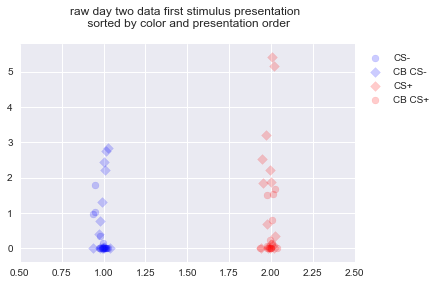

In [12]:

tmp_alpha = .2
tmp_len = len(np.nonzero(order==False)[0])
sns.set_style("dark", {'axes.grid' : True})
cb_jitter = np.random.randn(len(cb))/50
bc_jitter = np.random.randn(len(bc))/50

scatter(np.ones(tmp_len) + bc_jitter,
        renewal_minus[order==False], 
        color='blue',alpha=tmp_alpha, label='CS-')

scatter(np.ones(sum(order==True)) + cb_jitter, 
        renewal_minus[order==True], 
        color='blue',marker='D', alpha=tmp_alpha,label='CB CS-')

scatter(np.ones(tmp_len)+1 + bc_jitter,
        renewal_plus[order==False], 
        color='red',marker='D',alpha=tmp_alpha, label='CS+')

scatter(np.ones(sum(order==True))+1 + cb_jitter,
        renewal_plus[order==True], 
        color='red',alpha=tmp_alpha,label='CB CS+')

xlim(.5,2.5) ; #ylim(-.3,2.3); 
legend(bbox_to_anchor=(1.25, 1)) ; 
title('raw day two data first stimulus presentation \n sorted by color and presentation order\n'); 


In [13]:

# find amplitude over the first two trials


In [14]:

block_length = 2
day_two.nSeconds = 4.5

pos_renewal_stims = np.zeros([day_two.nSubjects, block_length])
neg_renewal_stims  = np.zeros([day_two.nSubjects, block_length])

for i_stim in range(block_length):  
    neg_renewal_stims[:, i_stim], pos_renewal_stims[:, i_stim] = day_two.amplitudeDifference('trans',
                                                                                              i_stim,
                                                                                             'onset')

In [15]:

# controll for learning on day one like we did in part one of the study


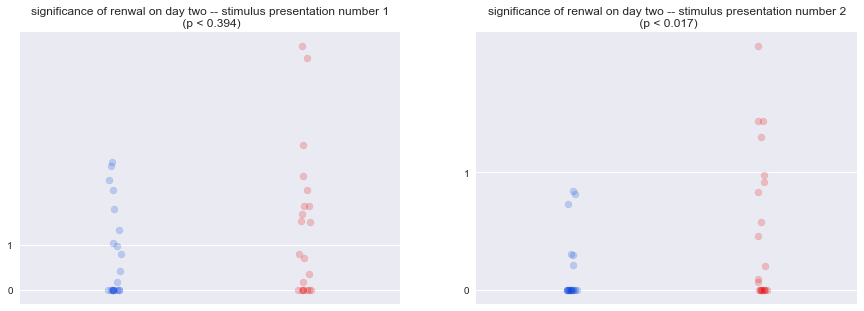

In [16]:
figure(figsize=[15,5])
for i_stim in [0,1]: 
    
    p_renewal = stats.wilcoxon(neg_renewal_stims[:,i_stim][responders], 
                               pos_renewal_stims[:,i_stim][responders])[1]
    subplot(1,2,i_stim+1)
    x_locations = np.zeros(sum(responders)) + np.random.randn(sum(responders))/50
    scatter(x_locations,   neg_renewal_stims[responders,i_stim], alpha=.2, color='xkcd:blue')
    scatter(x_locations+1, pos_renewal_stims[responders,i_stim], alpha=.2, color='xkcd:red')
    title('significance of renwal on day two -- stimulus presentation number %s\n (p < %.3f)'
          %(str(i_stim + 1), p_renewal))
    xlim(-.5,1.5); xticks([]); yticks([0,1])


In [17]:
neg_block_renewal = mean(neg_renewal_stims,1)[responders]
pos_block_renewal = mean(pos_renewal_stims,1)[responders]

In [18]:
_, p_renewal = stats.wilcoxon(neg_block_renewal, pos_block_renewal)

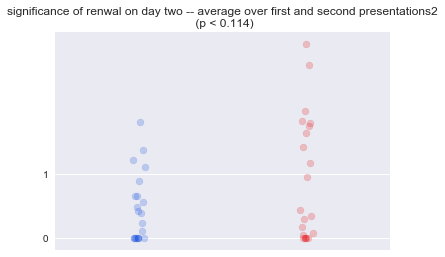

In [19]:
x_locations = np.zeros(sum(responders)) + np.random.randn(sum(responders))/50

scatter(x_locations,   neg_block_renewal, alpha=.2, color='xkcd:blue')
scatter(x_locations+1, pos_block_renewal, alpha=.2, color='xkcd:red')


title('significance of renwal on day two -- average over first and second presentations%s\n (p < %.3f)'
      %(str(i_stim + 1), p_renewal))
xlim(-.5,1.5)  ; xticks([]) ; yticks([0,1]); 


In [20]:

log_renewal_plus  = log(1 + renewal_plus)
log_renewal_minus = log(1 + renewal_minus)
log_renewal =  log_renewal_plus - log_renewal_minus 


(array([ -3.42317638e-04,  -2.20093434e-05,  -2.22128143e-04,
         -1.03091014e-04,  -3.93415652e-05,   1.46258398e+00,
         -1.14899752e-04,   6.52553326e-01,   1.49409272e-02,
         -6.21917416e-05,  -4.93169908e-05,   2.27857849e-01,
         -3.50870130e-05,   9.00287150e-01,  -4.29578884e-05,
          5.25193655e-01,  -6.17527925e-05,   1.71157213e+00,
         -1.21277570e-04,  -1.27528161e-04,   7.55436217e-02,
          5.40321266e-01,  -4.19676934e-05,  -9.84900241e-05,
         -2.55244717e-04,  -1.91065504e-04,  -4.49629237e-05,
          5.84105819e-02,  -4.73205591e-05]),
 array([  3.33901025e-01,   1.29402823e-02,  -9.03856075e-04,
         -3.05848015e-04,   3.53101587e-01,  -1.19638904e-03,
          2.05755791e+00,   1.44328867e+00,   3.85425487e-04,
          4.74848030e-01,  -3.17905471e-05,  -4.80331738e-04,
          3.36463444e-02,  -4.80960045e-04,   1.19225081e-02,
         -4.02558459e-05,  -3.99446346e-04,  -6.23820493e-05,
          1.21597917e-01

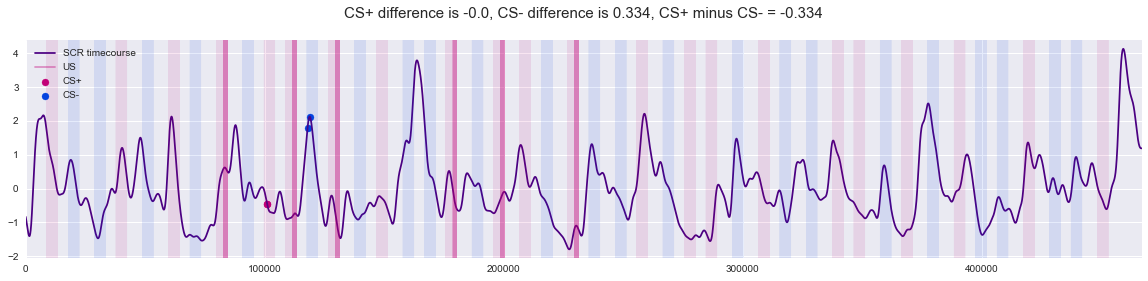

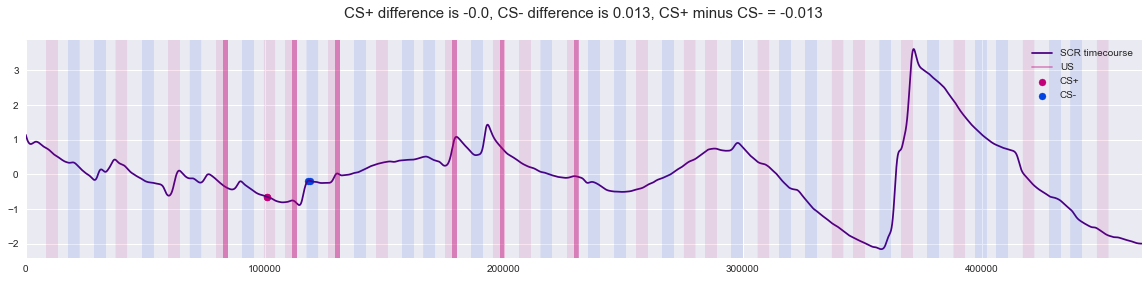

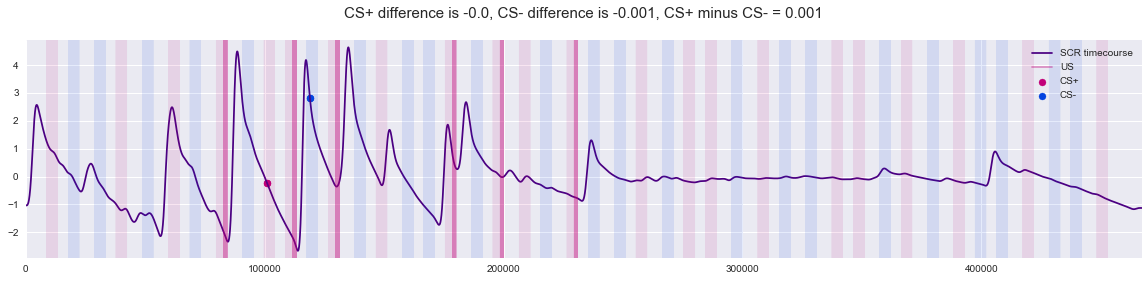

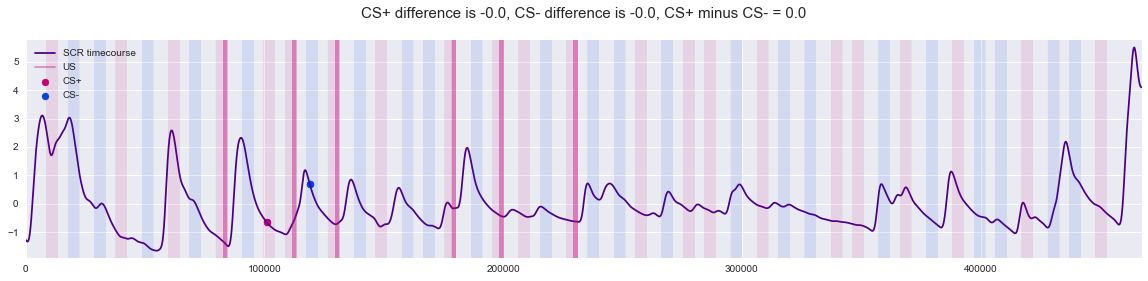

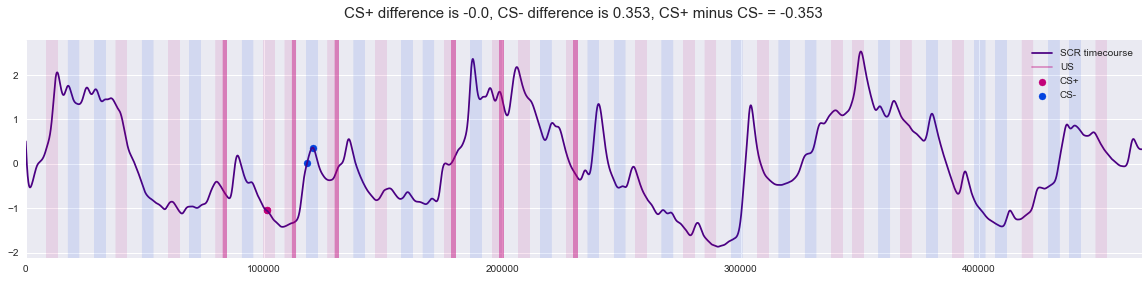

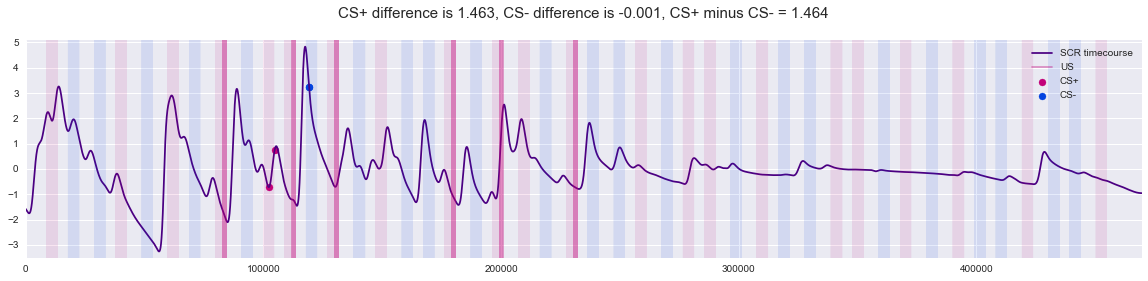

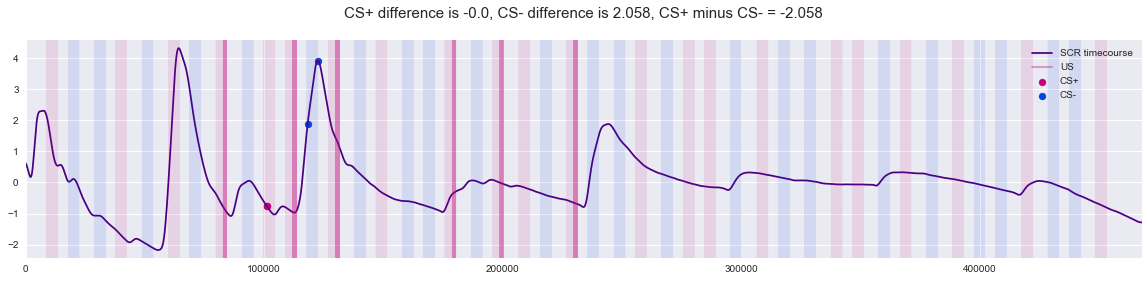

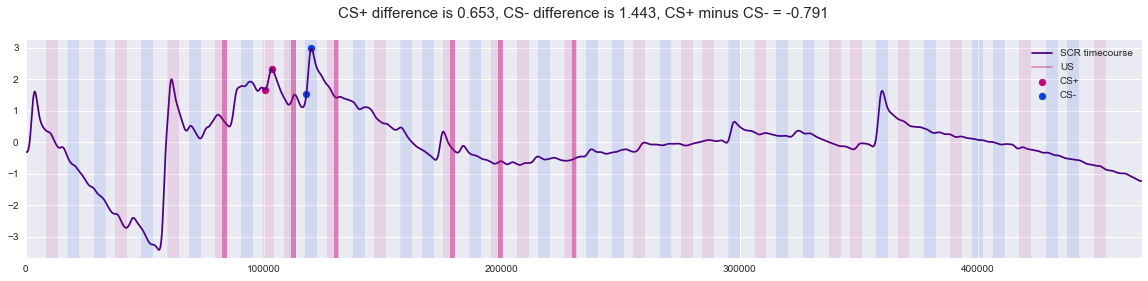

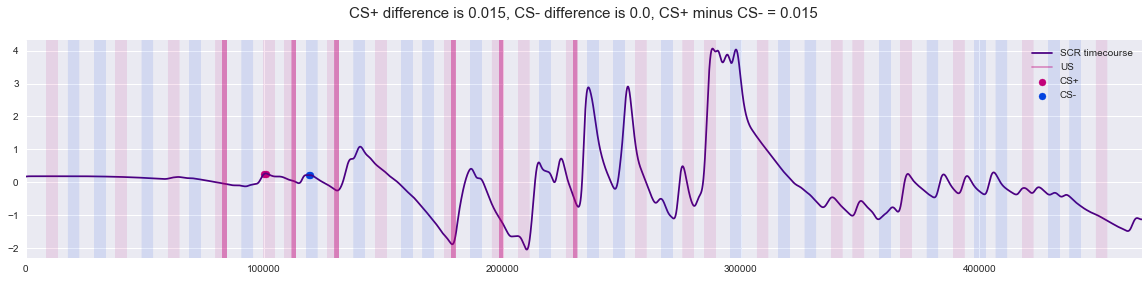

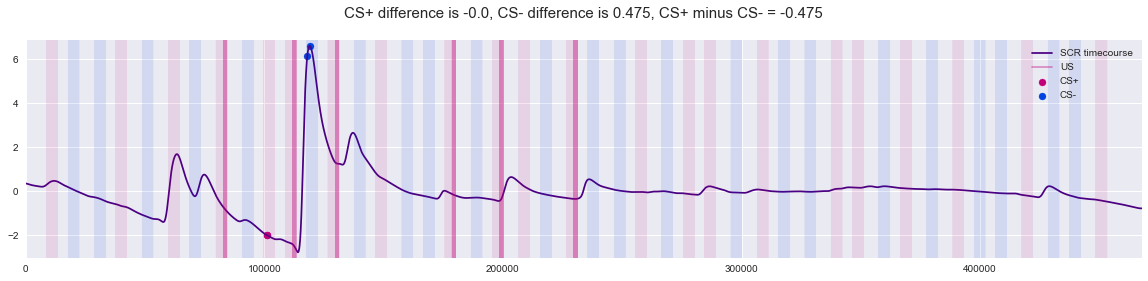

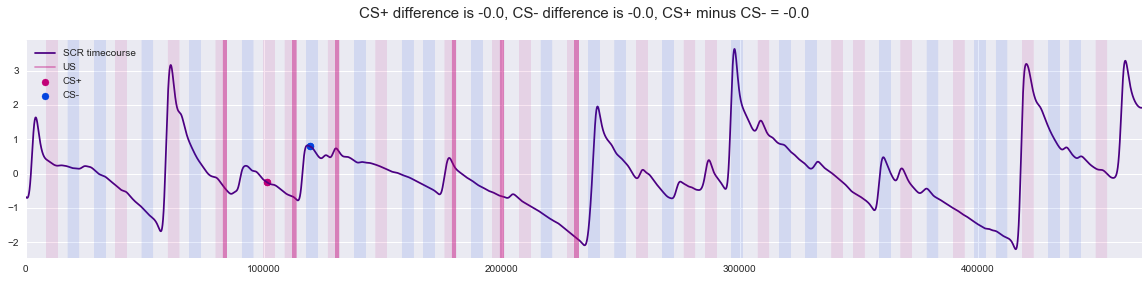

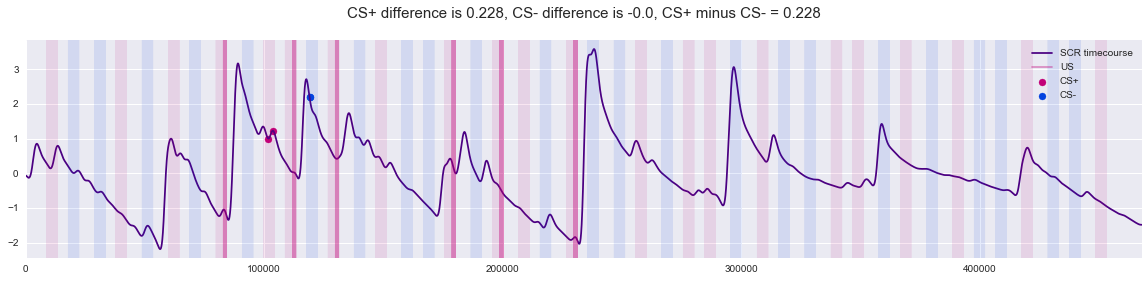

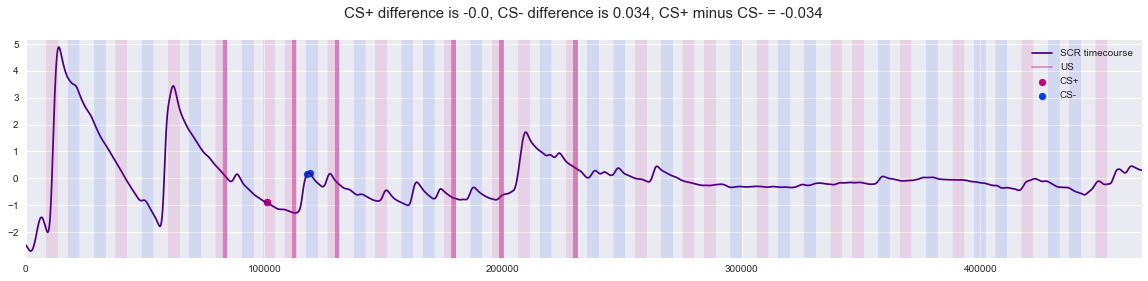

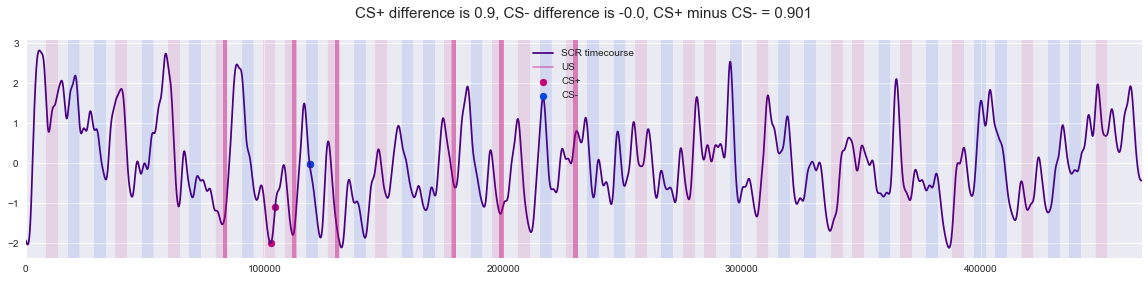

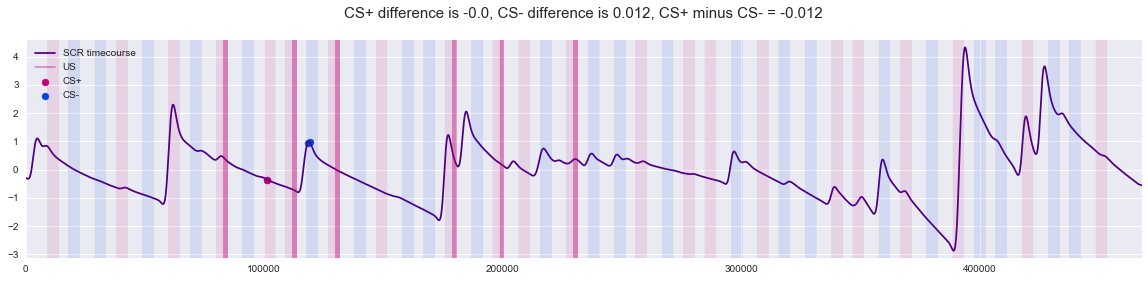

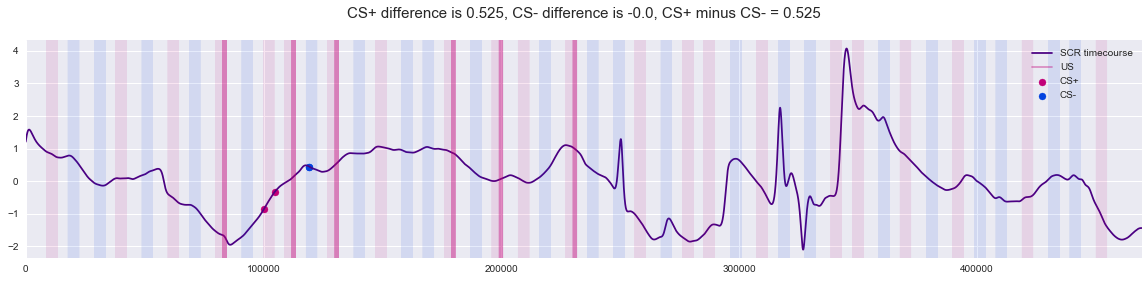

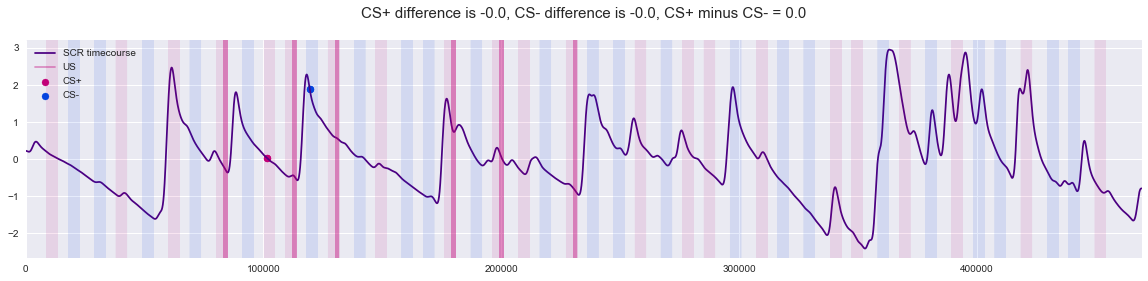

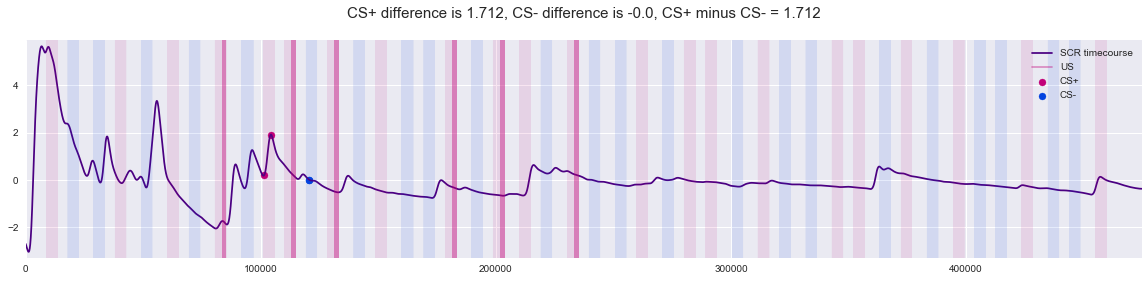

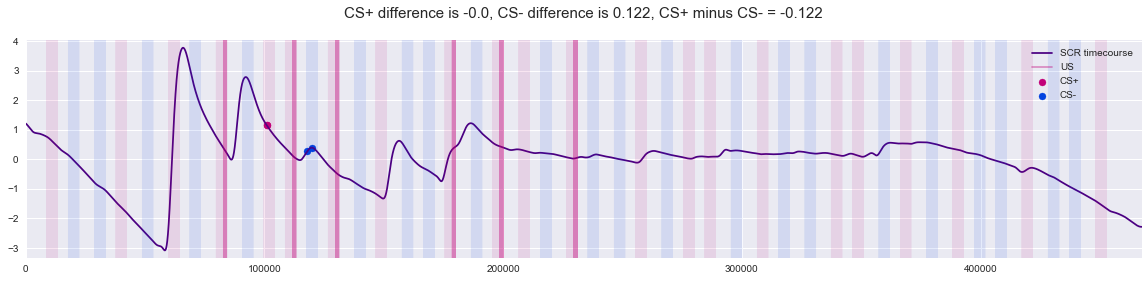

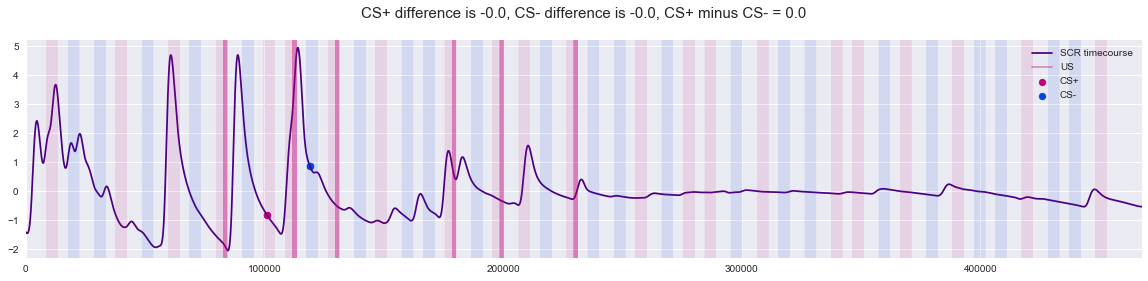

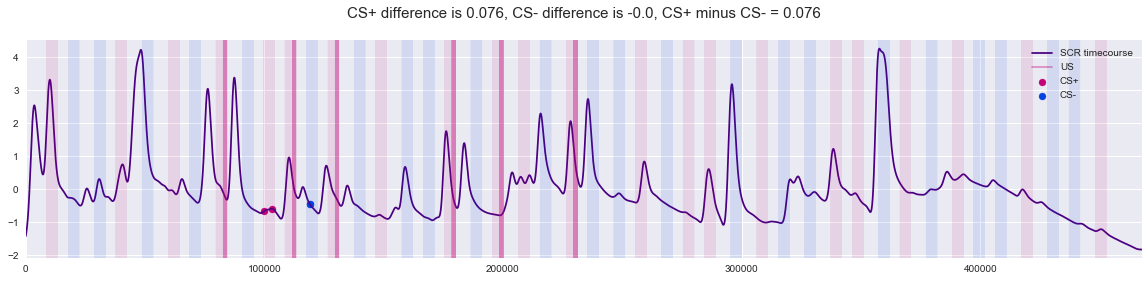

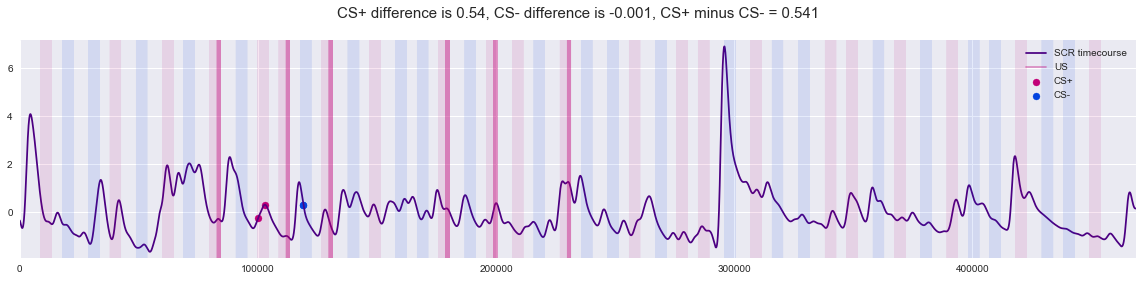

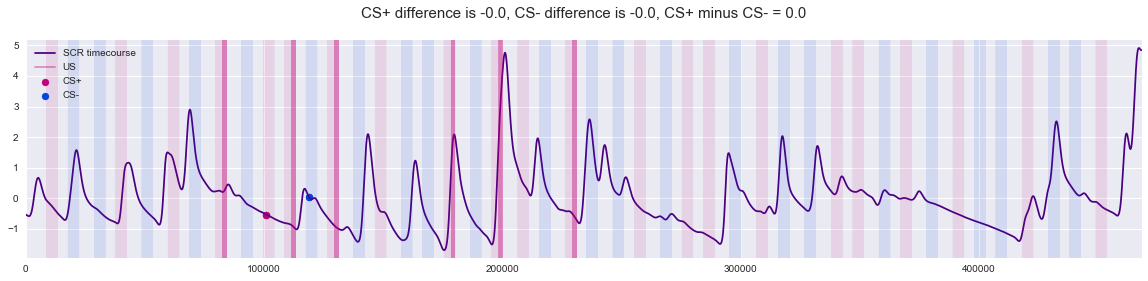

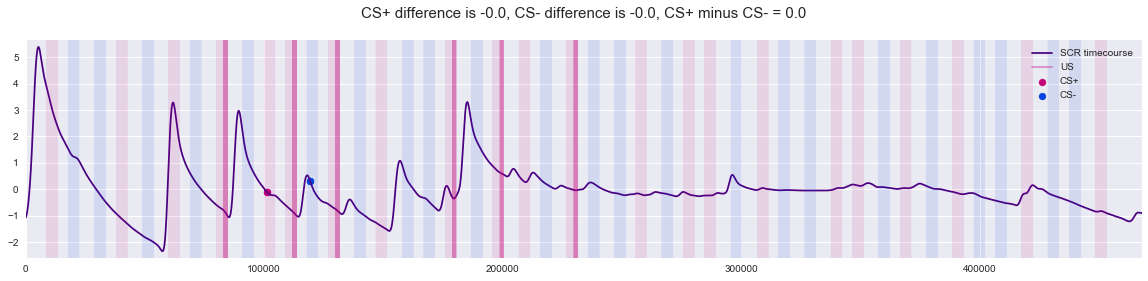

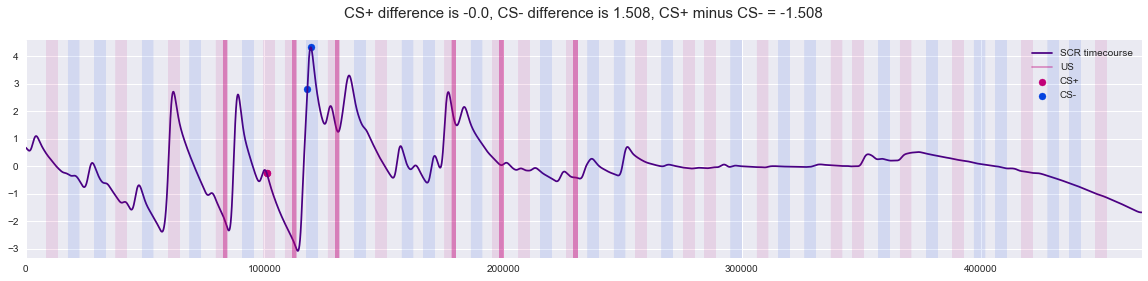

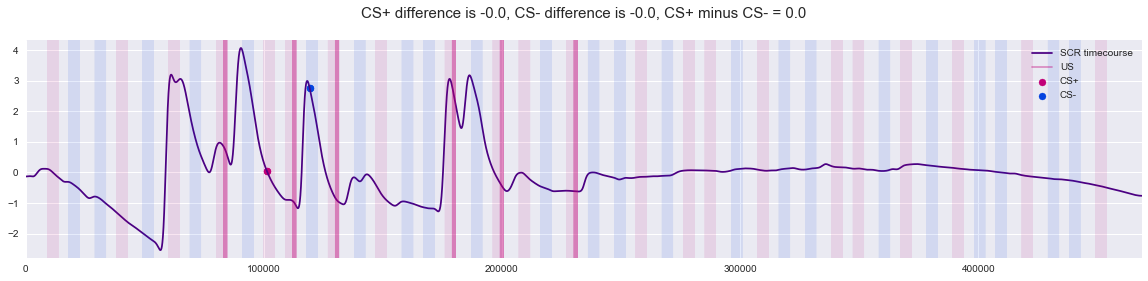

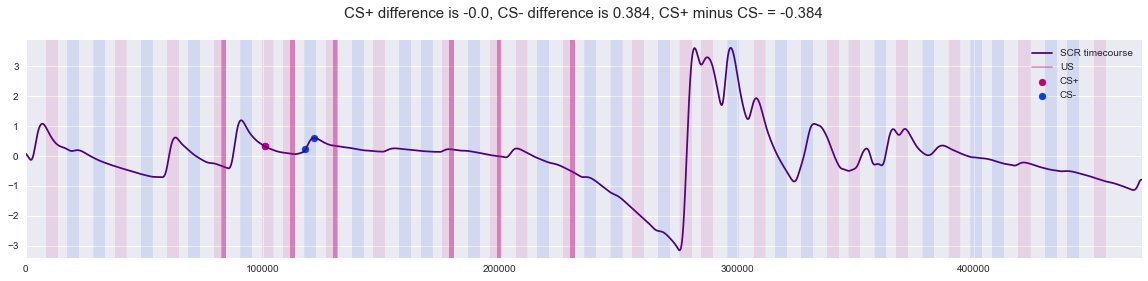

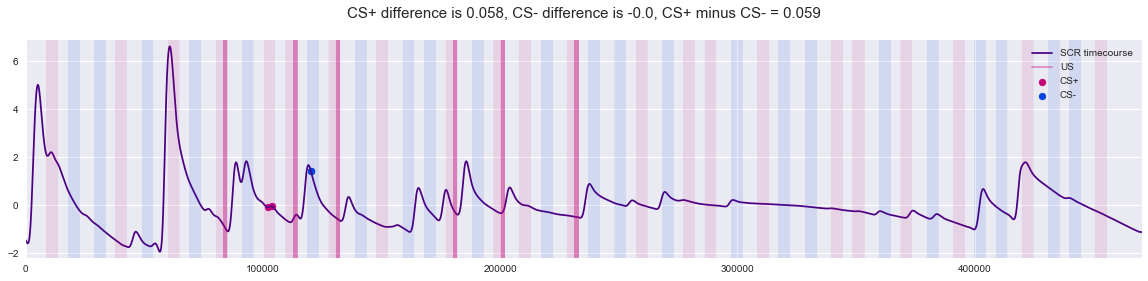

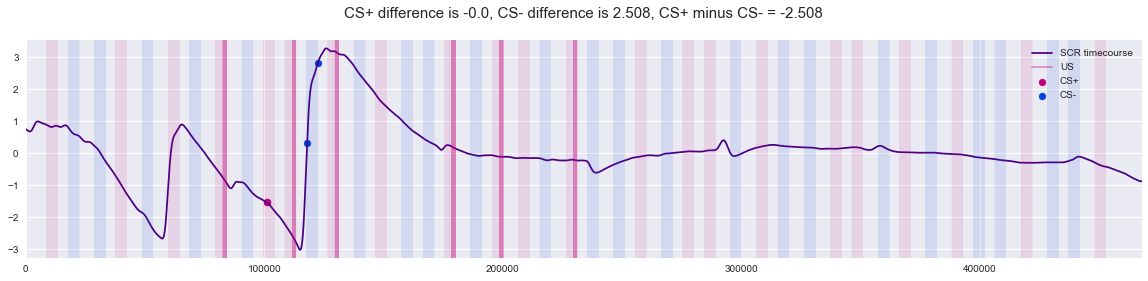

In [77]:
day_one.amplitudeDifference('trans',4,'onset',show=1)

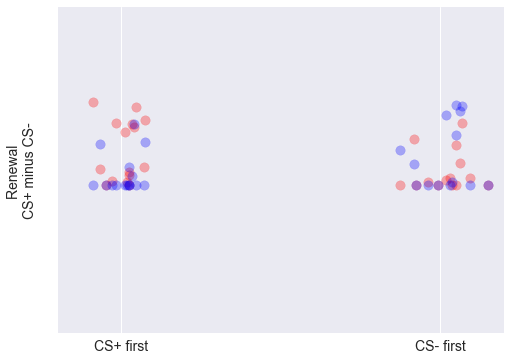

In [78]:

figure(figsize=[8,6])

jitter = np.random.randn(len(order))/20
scatter(order + jitter, log_renewal_plus, color='red', alpha=.3, s=90)
scatter(order + jitter, log_renewal_minus, color='blue', alpha=.3, s=90)

ylabel('Renewal \nCS+ minus CS-\n', rotation=90, fontsize=14)
yticks([]) 
xticks([0, 1],['CS+ first','CS- first'], fontsize=14)
xlim(-.2, 1.2)  ; ylim(-2.5, 3); 


In [79]:

# find measure of learning on day one


In [80]:
start_con_onsets = 4
end_con_onsets   = 13
conditioning_pos_onsets = np.zeros([day_one.nSubjects,len(range(start_con_onsets,end_con_onsets))])
conditioning_neg_onsets = np.zeros([day_one.nSubjects,len(range(start_con_onsets,end_con_onsets))])

day_one.nSeconds = 4.5
conditioning = list(range(start_con_onsets,end_con_onsets))

for i_stim in range(0,len(conditioning)):
    conditioning_pos_onsets[:,i_stim], conditioning_neg_onsets[:,i_stim] = day_one.amplitudeDifference('raw',
                                                                           conditioning[i_stim],
                                                                           'onset');
conditioning_significance_onsets = np.zeros(day_one.nSubjects)

for i_subject in range(0,day_one.nSubjects): 
    conditioning_significance_onsets[i_subject] = scipy.stats.wilcoxon(conditioning_pos_onsets[i_subject,:],
                                                                 conditioning_neg_onsets[i_subject,:])[1]
    
log_conditioning_pos_onsets = log(1 + conditioning_pos_onsets)
log_conditioning_neg_onsets = log(1 + conditioning_neg_onsets)

# final learning metric on day one
log_learning = mean(log_conditioning_pos_onsets - log_conditioning_neg_onsets,1)

In [81]:

log_renewal_plus  = log(1 + mean(pos_renewal_stims,1)) # log(1 + renewal_plus)
log_renewal_minus = log(1 + renewal_minus)
log_renewal =  log_renewal_plus - log_renewal_minus 


In [82]:
responders = np.array(mean(conditioning_neg_raw,1) > .01) | np.array(mean(conditioning_pos_raw,1) > .01) #| np.array(mean(conditioning_neg_raw,1) > .01)

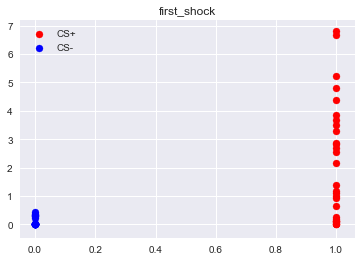

In [83]:



iStim =3
day_one.nSeconds = 4.5
first_shock_plus, first_shock_minus = day_one.amplitudeDifference('trans',iStim,'offset');

scatter(np.ones(len(first_shock_plus)), first_shock_plus, color='red', label='CS+')
scatter(np.zeros(len(first_shock_plus)), first_shock_minus, color='blue', label='CS-')
title('first_shock')
legend()

log_first_shock = log(1 + first_shock_plus) - log(1 + first_shock_minus)

In [84]:

# backbone of the physiological response analysis
SCR = pandas.DataFrame({   
                           'renewal':log_renewal[responders], 
                             'shock':log_first_shock[responders], 
                          'learning':log_learning[responders], 
                             'order':order[responders]
                       })

subject_names = [day_two.subjectNames[i_subject][1:3] for i_subject in np.nonzero(responders)[0]]
#subject_names = [day_two.subjectNames[i_subject][1:3] for i_subject in range(len(order))]
SCR.index = subject_names




In [85]:
SCR = SCR.drop('40') # not a naive subject
SCR = SCR.drop('42') # tyler fucked up proto#col

# SCR = SCR.drop('44') 
# SCR = SCR.drop('41') 
# SCR = SCR.drop('25')
# SCR = SCR.drop('28')

In [86]:

order_formula = 'renewal ~ order'
order_model = ols(order_formula, SCR).fit()
order_table = anova_lm(order_model, typ=2)
print '\n\n\t\t', order_formula, '\n\n', order_table


prediction_formula = 'renewal ~ learning'
prediction_model = ols(prediction_formula, SCR).fit()
prediction_table = anova_lm(prediction_model, typ=2)
print '\n\n\t\t', prediction_formula, '\n\n', prediction_table


prediction_shock_formula = 'renewal ~ shock + learning'
prediction_shock_model = ols(prediction_shock_formula, SCR).fit()
prediction_shock_table = anova_lm(prediction_shock_model, typ=2)
print '\n\n\t\t', prediction_shock_formula, '\n\n', prediction_shock_table


prediction_order_formula = 'renewal ~ learning + C(order)'
prediction_order_model = ols(prediction_order_formula, SCR).fit()
prediction_order_table = anova_lm(prediction_order_model, typ=2)
print '\n\n\t', prediction_order_formula, '\n\n', prediction_order_table, '\n\n'

shock_order_formula = 'renewal ~ shock + C(order)'
prediction_order_model = ols(shock_order_formula, SCR).fit()
shock_order_table = anova_lm(prediction_order_model, typ=2)
print '\n\n\t', shock_order_formula, '\n\n', shock_order_table, '\n\n'


learning_order_shock_formula = 'renewal ~ learning + shock + C(order)'
learning_order_shock_model = ols(learning_order_shock_formula, SCR).fit()
learning_order_shock_table = anova_lm(learning_order_shock_model, typ=2)
print '\n\n\t', learning_order_shock_formula, '\n\n', learning_order_shock_table, '\n\n'


learning_pvalue = np.round(prediction_table.values[0,3],3)
learning_order_pvalue = np.round(prediction_order_table.values[1,3],3) 
shock_pvalue = np.round(shock_order_table.values[0,3],3) 




		renewal ~ order 

            sum_sq    df         F    PR(>F)
order     2.078532   1.0  8.139611  0.008571
Residual  6.384003  25.0       NaN       NaN


		renewal ~ learning 

            sum_sq    df         F    PR(>F)
learning  1.780539   1.0  6.661703  0.016107
Residual  6.681996  25.0       NaN       NaN


		renewal ~ shock + learning 

            sum_sq    df         F    PR(>F)
shock     0.046637   1.0  0.168686  0.684926
learning  1.025509   1.0  3.709251  0.066037
Residual  6.635359  24.0       NaN       NaN


	renewal ~ learning + C(order) 

            sum_sq    df         F    PR(>F)
C(order)  1.055497   1.0  4.502256  0.044368
learning  0.757504   1.0  3.231157  0.084844
Residual  5.626499  24.0       NaN       NaN 




	renewal ~ shock + C(order) 

            sum_sq    df         F    PR(>F)
C(order)  1.594671   1.0  6.309080  0.019145
shock     0.317807   1.0  1.257355  0.273247
Residual  6.066196  24.0       NaN       NaN 




	renewal ~ learning + shock + C(ord

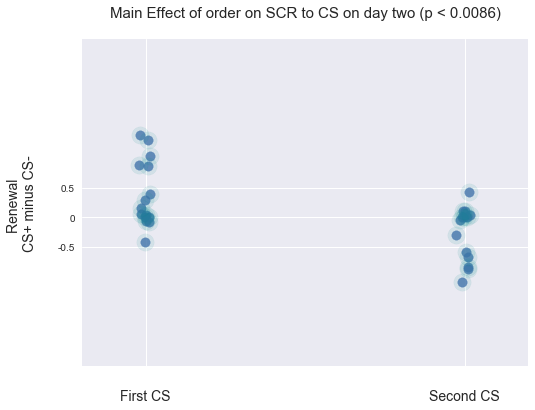

In [87]:

figure(figsize=[8,6])
sns.set_style("dark", {'axes.grid' : True})
jitter = np.random.randn(len(order))/100
scatter(order + jitter,log_renewal, alpha=.8, s=90)
scatter(order + jitter,log_renewal, color='darkcyan', alpha=.1, s=300)
ylabel('Renewal \nCS+ minus CS-\n', rotation=90, fontsize=14)

yticks([-.5,0,.5,],[-.5,0,.5])
xticks([0, 1],['\nFirst CS','\nSecond CS'], fontsize=14)
xlim(-.2, 1.2)
ylim(-2.5, 3)
title('Main Effect of order on SCR to CS on day two (p < %.04f)\n'%order_table.values[0,3], fontsize=15); 


In [88]:
# X, y = SCR['learning'],  SCR['renewal']

# # Note the difference in argument order
# model = sm.OLS(y, X).fit()
# renewal_learning_predictions = model.predict(X) # make the predictions by the model

# # Print out the statistics
# model.summary()

# scatter(X,y)
# plot(X,renewal_learning_predictions)
# title(model.pvalues)

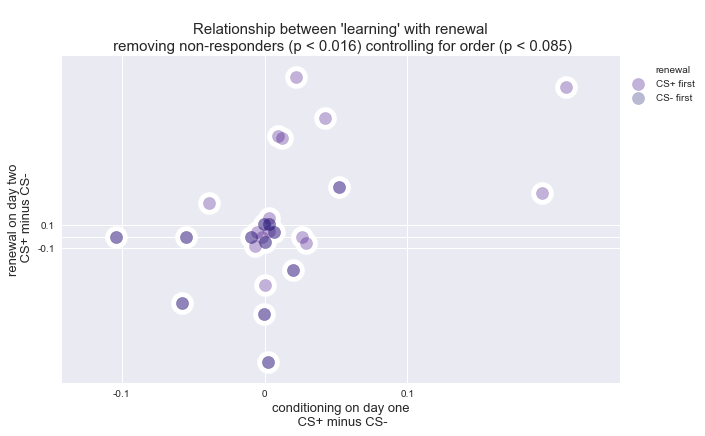

In [90]:
figure(figsize=(10,6))

sns.set_style("dark", {'axes.grid' :True})
scatter(SCR['learning'], SCR['renewal'], color='xkcd:white', alpha=1,s=500)
scatter(SCR['learning'], SCR['renewal'], color='xkcd:indigo',alpha=.3,s=150, label='CS+ first')
scatter(SCR['learning'][SCR['order'] == True], SCR['renewal'][SCR['order']  == True], color='midnightblue',alpha=.3, s=150,  label='CS- first')
legend(bbox_to_anchor=(1.15, 1)) 

xlabel('conditioning on day one\n CS+ minus CS-',fontsize=13)
ylabel('renewal on day two\n CS+ minus CS-',fontsize=13)
yticks([-.1,0,.1],[-.1,'',.1])
xticks([-.1,0,.1],[-.1,0,.1])

# # Note the difference in argument order
# model = sm.OLS(SCR['renewal'], SCR['learning']).fit()
# renewal_learning_predictions = model.predict(SCR['learning']) # make the predictions by the model
# plot(SCR['learning'],renewal_learning_predictions, linewidth=16, alpha=.5, color='white')
# plot( SCR['learning'],renewal_learning_predictions, linewidth=15, alpha=.1, color='xkcd:purple')
# responder_names = np.array(day_two.subjectNames)[responders]

show_ids = 0
if show_ids: 
    for i_subject in range(len(SCR.index)):
        plt.annotate(SCR.index[i_subject], xy=(SCR['learning'][i_subject], SCR['renewal'][i_subject]), 
                     xytext=(-20, -25), textcoords='offset points', alpha=.3, fontsize=15)

title("\nRelationship between 'learning' with renewal\n removing non-responders (p < %.3f) "
      "controlling for order (p < %.3f)"
      %(learning_pvalue, learning_order_pvalue), fontsize=15); 

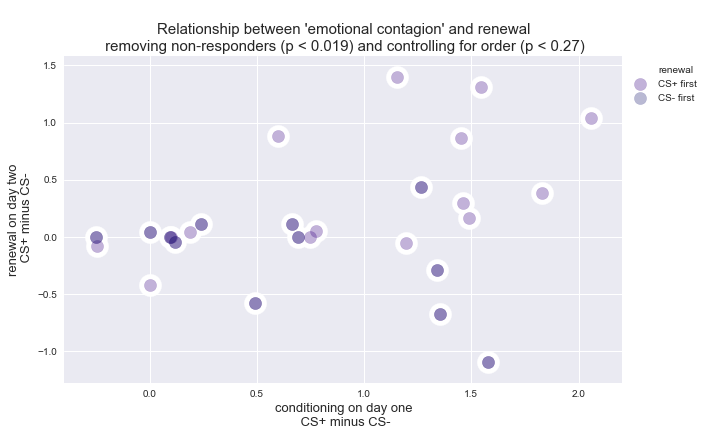

In [91]:
figure(figsize=(10,6))

scatter(SCR['shock'], SCR['renewal'], color='xkcd:white', alpha=1,s=500)
scatter(SCR['shock'], SCR['renewal'], color='xkcd:indigo',alpha=.3,s=150, label='CS+ first')
scatter(SCR['shock'][SCR['order'] == True], SCR['renewal'][SCR['order']  == True], color='midnightblue',alpha=.3, s=150,  label='CS- first')
sns.set_style("dark", {'axes.grid' : True})
legend(bbox_to_anchor=(1.15, 1)) 
xlabel('conditioning on day one\n CS+ minus CS-',fontsize=13)
ylabel('renewal on day two\n CS+ minus CS-',fontsize=13)
# yticks([-.1,0,.1],[-.1,'',.1])
# xticks([-.1,0,.1],[-.1,0,.1])

# # Note the difference in argument order
# model = sm.OLS(SCR['renewal'], SCR['shock']).fit()
# renewal_shock_predictions = model.predict(SCR['shock']) # make the predictions by the model
# plot(SCR['shock'],renewal_shock_predictions, linewidth=40, alpha=.5, color='white')
# plot(SCR['shock'],renewal_shock_predictions, linewidth=15, alpha=.1, color='xkcd:purple')

responder_names = np.array(day_two.subjectNames)[responders]


# for i_subject in range(len(SCR.index)):
#     plt.annotate(SCR.index[i_subject], xy=(SCR['learning'][i_subject], SCR['renewal'][i_subject]), 
#                  xytext=(-20, -25), textcoords='offset points', alpha=.3, fontsize=15)

title("\nRelationship between 'emotional contagion' and renewal\n removing non-responders (p < %.3f)" 
      " and controlling for order (p < %.2f)"
      %(shock_pvalue,shock_order_table.values[1,3]), fontsize=15); 

In [92]:

block_length = 2
day_two.nSeconds = 4.5

block_renewal_minus = np.zeros([day_two.nSubjects, block_length])
block_renewal_plus  = np.zeros([day_two.nSubjects, block_length])

for i_stim in range(block_length):  

    block_renewal_minus[:, i_stim], block_renewal_plus[:, i_stim] = day_two.amplitudeDifference('trans',
                                                                                                i_stim,
                                                                                                'onset')
    
log_second_renewal_stim = log(1 + block_renewal_plus[:,1]) - log(1 + block_renewal_minus[:,1])


Ttest_indResult(statistic=1.6739614898125033, pvalue=0.099715371359954549)

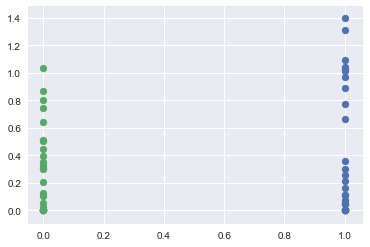

In [93]:
scatter(np.ones(day_two.nSubjects), log(1+ np.mean(block_renewal_plus,1)))
scatter(np.zeros(day_two.nSubjects), log(1 + np.mean(block_renewal_minus,1)))

block_renewal =  np.mean(block_renewal_plus,1) - np.mean(block_renewal_minus,1)

stats.ttest_ind(np.mean(block_renewal_plus,1)[responders], np.mean(block_renewal_minus,1)[responders])

In [94]:
import pickle

In [95]:

with open('gaze_analysis_objects.pkl') as f:  # Python 3: open(..., 'rb')
    main, gaze_data, gaze_subjects = pickle.load(f)

with open('behavioral_analysis_objects.pkl') as f:  # Python 3: open(..., 'rb')
    all_behavioral, session_data, trait_data = pickle.load(f)

In [96]:
gaze_subjects = gaze_subjects
session_subjects = [int(session_data['subject_id'].values[ii]) for ii in range(len(session_data['subject_id']))]
trait_subjects = [int(trait_data['subject names'].values[ii][1:]) for ii in range(len(trait_data['subject names']))]

In [97]:
# for reference
old_data = zip(gaze_subjects, main['CS']['face'])

# fast not beautiful alignment
gaze_subjects.pop(-3) 
gaze_subjects.pop(17)

for i_onset in main.keys(): 
    for i_region in main[i_onset]: 
        main[i_onset][i_region].pop(-3)
        main[i_onset][i_region].pop(17)

# inspected visually, but deleated 

In [98]:
for i_onset in main.keys(): 
    for i_region in main[i_onset]: 
        session_data.loc[:,'%s_%s'%(i_onset, i_region)] = pandas.Series(main[i_onset][i_region], 
                                                                      index=trait_data.index)

In [99]:
behave = session_data

In [100]:
behave.index = session_subjects

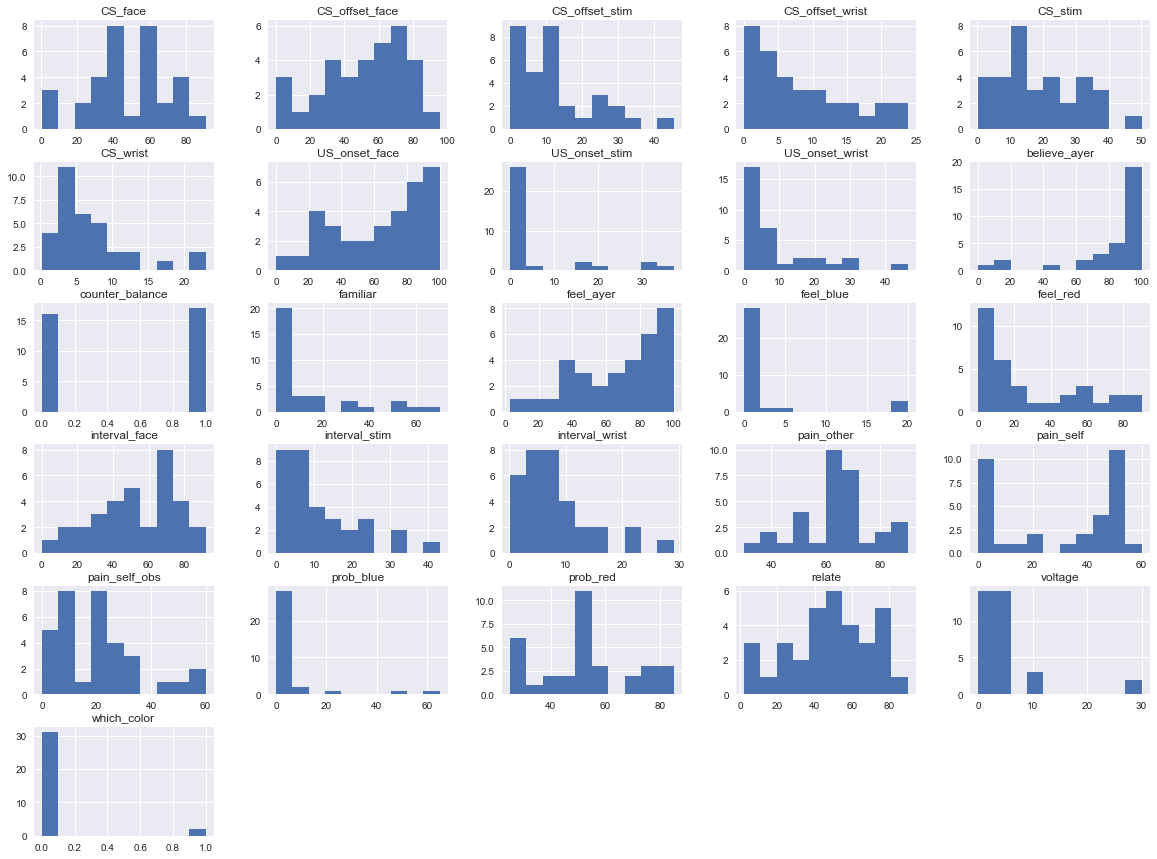

In [101]:
behave.hist(figsize=[20,15]); 

In [102]:
# remove nonresponders from the rest of the behavrioal data

to_remove = [] 

behave.index = behave['subject_id'].values

for i_subject in range(len(behave)): 

    tmp_sub = behave.index.values[i_subject]

    if tmp_sub not in SCR.index.values: 

        to_remove.append(tmp_sub)

for remove in to_remove: 
    behave = behave.drop(remove)

In [103]:
behave = behave.join(SCR)

In [104]:
behave

believe_ayer color  counter_balance  familiar  feel_ayer  feel_blue  \
19         100.0   red                1      60.0      100.0        0.0   
20          80.0   red                0       0.0       80.0       20.0   
21         100.0   red                1       0.0       75.0        0.0   
23          90.0   red                1      30.0       90.0        0.0   
24          15.0   red                0       0.0        3.0        0.0   
25          40.0   red                1       0.0       70.0       20.0   
26         100.0   red                0       0.0      100.0        0.0   
27          60.0   red                1      30.0       40.0        0.0   
28          60.0   red                0      40.0       60.0        3.0   
29          90.0   red                1      50.0       90.0        0.0   
30          70.0   red                0      10.0       80.0        0.0   
31          90.0   red                1       0.0       90.0        0.0   
32          90.0   red                0       0.0       90.0        0.0   
33         100.0   red                1       0.0       45.0        0.0   
34          70.0   red                0       0.0       70.0        0.0   
35         100.0   red                1       0.0      100.0        0.0   
37         100.0   red                1      10.0       20.0        0.0   
38          10.0   red                0       0.0       30.0        0.0   
39          90.0   red                1      20.0       60.0        0.0   
41          70.0   red                1       0.0      100.0        0.0   
43           0.0   red                1      20.0       50.0        0.0   
44         100.0   red                0       0.0      100.0        0.0   
45         100.0   red                1      50.0      100.0        0.0   
46          90.0  blue                0       0.0       90.0       20.0   
48          90.0   red                0       0.0       40.0        0.0   
50          95.0   red                0       0.0       95.0        0.0   
53          80.0   red                1       0.0       50.0        0.0   

    feel_red  pain_other  pain_self  pain_self_obs    ...     interval_stim  \
19      70.0        58.0       10.0            6.0    ...          1.369767   
20      90.0        50.0        3.0           20.0    ...         42.941860   
21      60.0        60.0       50.0           25.0    ...          3.848837   
23      40.0        45.0       40.0           10.0    ...         12.867442   
24      10.0        50.0       45.0            0.0    ...          3.669767   
25      50.0        70.0       50.0           20.0    ...         31.513953   
26       5.0        40.0        3.0           10.0    ...          2.737209   
27      80.0        65.0       50.0           10.0    ...         15.646512   
28       6.0        90.0       60.0           60.0    ...         32.320930   
29      15.0        50.0       15.0           20.0    ...          0.000000   
30       0.0        30.0        3.0            1.0    ...          0.455814   
31      10.0        60.0       44.0           20.0    ...         20.495349   
32      10.0        68.0        0.0           60.0    ...          1.446512   
33      20.0        90.0       45.0           10.0    ...         20.141860   
34       0.0        80.0       45.0           28.0    ...          4.997674   
35       1.0        70.0       50.0           50.0    ...          9.283721   
37       0.0        60.0       40.0           10.0    ...         25.523256   
38       0.0        70.0        0.0           10.0    ...          9.913953   
39       0.0        80.0       18.0           33.0    ...          9.986047   
41      10.0        70.0       50.0           20.0    ...          5.358140   
43      30.0        70.0        0.0            5.0    ...         13.569767   
44       2.0        75.0        0.0           45.0    ...          5.920930   
45      60.0        70.0       50.0           20.0    ...         21.867442   
46     

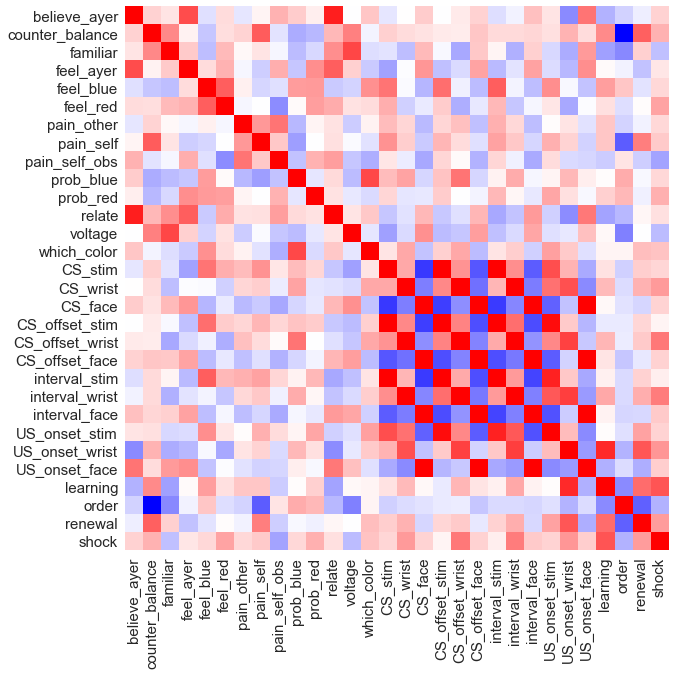

In [105]:
bcorr = behave.corr()

b_names = bcorr.columns

sns.set_style("dark", {'axes.grid' : False})

figure(figsize=[10,10])

imshow(bcorr,cmap='bwr')

xs = np.arange(0,len(b_names),1)
ys = np.arange(0,len(b_names),1)

imshow(bcorr, cmap='bwr', vmin=-.8, vmax=.8)

xticks(xs, b_names[xs], rotation=90, fontsize=15)
yticks(ys, b_names[ys], fontsize=15);

In [106]:
def show_relationship(data_frame, x_var, y_var, color='indigo', alpha=.4): 
    figure(figsize=[10,6])
    X = data_frame[x_var]
    y = data_frame[y_var]
    sns.set_style("dark", {'axes.grid' : True})

    # Note the difference in argument order
    model = sm.OLS(y, X).fit()
    model_predictions = model.predict(X) # make the predictions by the model
    
    # OR 
    _formula_ = '%s ~ %s'%(y_var, x_var)
    _model_ = ols(_formula_, data_frame).fit()
    _table_ = anova_lm(_model_, typ=1)
    print '\n\n\t', _formula_, '\n\n', _table_, '\n\n'

    # Print out the statistics
    model.summary()
    scatter(X, y, s=300, color='white')
    scatter(X, y, s=100, color=color, alpha=alpha, label='pain_other')
    #plot(X, model_predictions, label='pain_other', linewidth=10,alpha=.3)
    xlabel(x_var, fontsize=15)
    ylabel(y_var, fontsize=15)
    title('Relationship between %s and %s (p < %.3f)\n'%(x_var, y_var, _table_.values[0,4]), fontsize=15)

In [107]:
behave.keys()

Index([u'believe_ayer', u'color', u'counter_balance', u'familiar',
       u'feel_ayer', u'feel_blue', u'feel_red', u'pain_other', u'pain_self',
       u'pain_self_obs', u'prob_blue', u'prob_red', u'relate', u'subject_id',
       u'voltage', u'which_color', u'CS_stim', u'CS_wrist', u'CS_face',
       u'CS_offset_stim', u'CS_offset_wrist', u'CS_offset_face',
       u'interval_stim', u'interval_wrist', u'interval_face', u'US_onset_stim',
       u'US_onset_wrist', u'US_onset_face', u'learning', u'order', u'renewal',
       u'shock'],
      dtype='object')



	feel_ayer ~ US_onset_face 

                 df        sum_sq      mean_sq         F    PR(>F)
US_onset_face   1.0   2479.832162  2479.832162  3.491712  0.073438
Residual       25.0  17755.130801   710.205232       NaN       NaN 




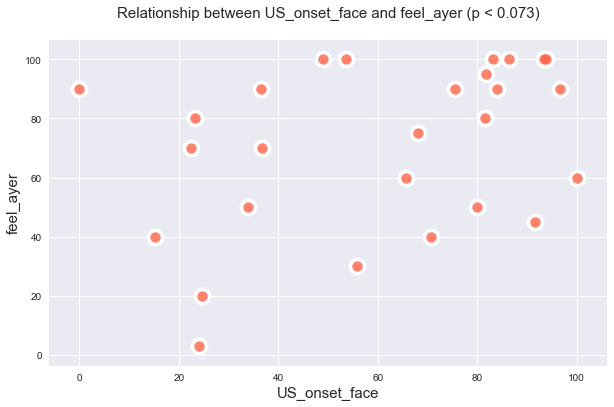

In [108]:
show_relationship(behave, 'US_onset_face', 'feel_ayer', color='tomato', alpha=.8)



	believe_ayer ~ US_onset_face 

                 df        sum_sq      mean_sq         F    PR(>F)
US_onset_face   1.0   4214.830259  4214.830259  5.887249  0.022797
Residual       25.0  17898.132704   715.925308       NaN       NaN 




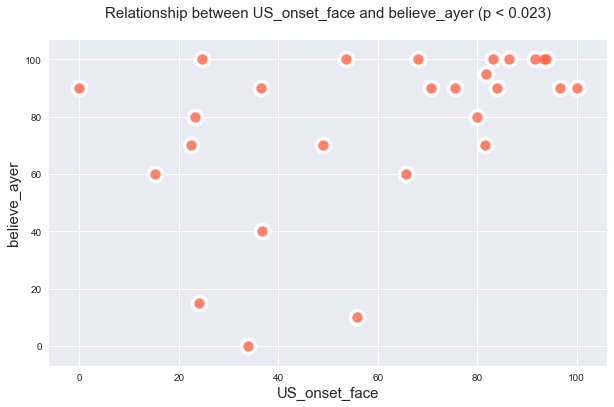

In [109]:
show_relationship(behave, 'US_onset_face', 'believe_ayer', color='tomato', alpha=.8)



	relate ~ US_onset_face 

                 df        sum_sq      mean_sq         F    PR(>F)
US_onset_face   1.0   2394.244060  2394.244060  5.343846  0.029322
Residual       25.0  11200.941125   448.037645       NaN       NaN 




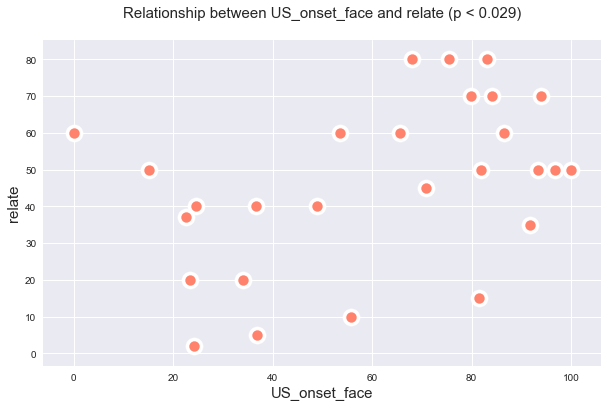

In [110]:
show_relationship(behave, 'US_onset_face', 'relate', color='tomato', alpha=.8)



	feel_ayer ~ US_onset_face 

                 df        sum_sq      mean_sq         F    PR(>F)
US_onset_face   1.0   2479.832162  2479.832162  3.491712  0.073438
Residual       25.0  17755.130801   710.205232       NaN       NaN 




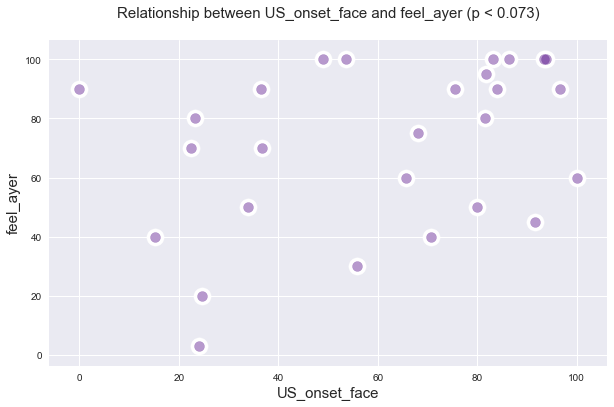

In [111]:
show_relationship(behave, 'US_onset_face', 'feel_ayer', color='indigo')



	renewal ~ US_onset_wrist 

                  df    sum_sq   mean_sq         F    PR(>F)
US_onset_wrist   1.0  2.382409  2.382409  9.795886  0.004411
Residual        25.0  6.080126  0.243205       NaN       NaN 




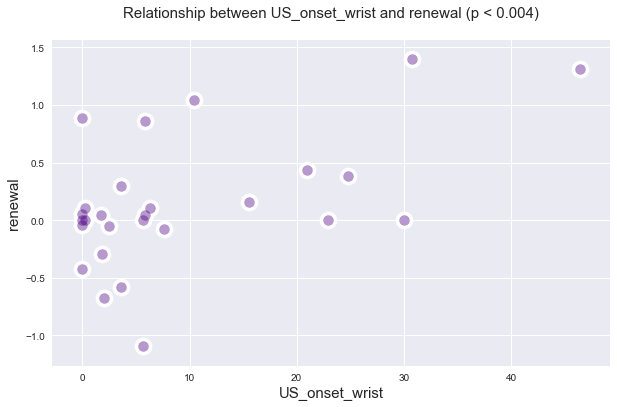

In [112]:
show_relationship(behave, 'US_onset_wrist', 'renewal', color='indigo')



	shock ~ US_onset_face 

                 df     sum_sq   mean_sq        F    PR(>F)
US_onset_face   1.0   0.282721  0.282721  0.60204  0.445079
Residual       25.0  11.740141  0.469606      NaN       NaN 




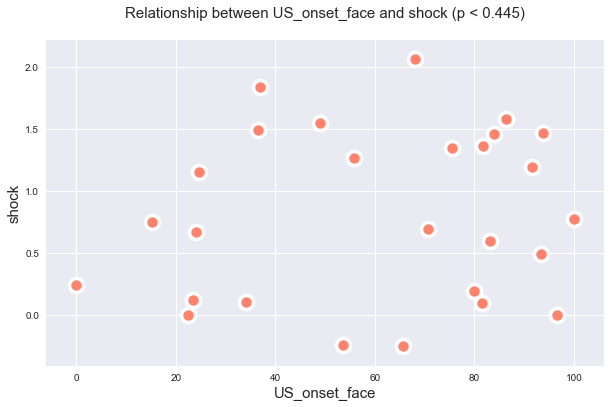

In [113]:
show_relationship(behave, 'US_onset_face', 'shock', color='tomato', alpha=.8)



	learning ~ US_onset_face 

                 df    sum_sq   mean_sq        F    PR(>F)
US_onset_face   1.0  0.006304  0.006304  1.61829  0.215036
Residual       25.0  0.097386  0.003895      NaN       NaN 




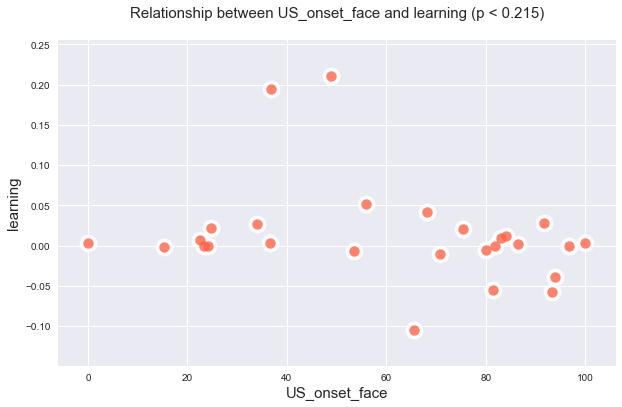

In [114]:
show_relationship(behave, 'US_onset_face', 'learning', color='tomato', alpha=.8)



	renewal ~ US_onset_face 

                 df    sum_sq   mean_sq         F    PR(>F)
US_onset_face   1.0  0.548814  0.548814  1.733742  0.199877
Residual       25.0  7.913721  0.316549       NaN       NaN 




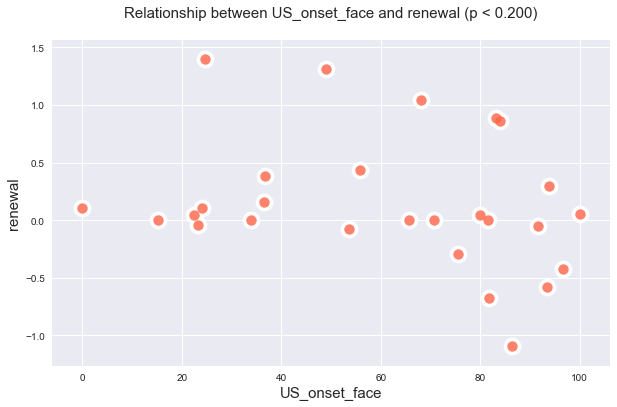

In [115]:
show_relationship(behave, 'US_onset_face', 'renewal', color='tomato', alpha=.8)



	shock ~ CS_offset_wrist 

                   df    sum_sq   mean_sq         F    PR(>F)
CS_offset_wrist   1.0  2.159628  2.159628  5.473935  0.027589
Residual         25.0  9.863234  0.394529       NaN       NaN 




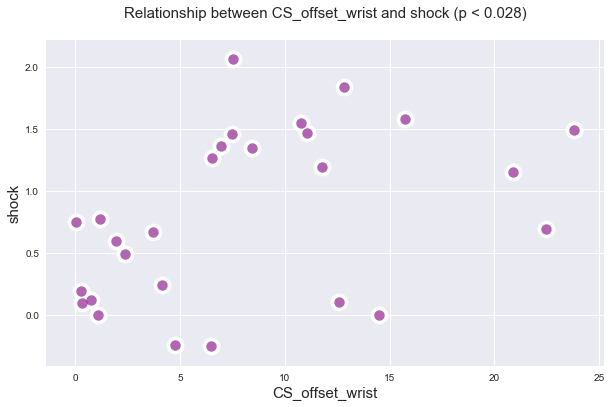

In [116]:
show_relationship(behave, 'CS_offset_wrist', 'shock', color='purple', alpha=.6)



	renewal ~ US_onset_wrist 

                  df    sum_sq   mean_sq         F    PR(>F)
US_onset_wrist   1.0  2.382409  2.382409  9.795886  0.004411
Residual        25.0  6.080126  0.243205       NaN       NaN 




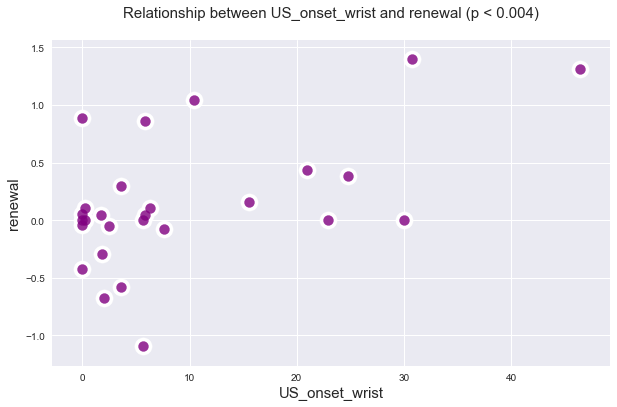

In [117]:
show_relationship(behave, 'US_onset_wrist', 'renewal', color='purple', alpha=.8)



	learning ~ US_onset_face 

                 df    sum_sq   mean_sq        F    PR(>F)
US_onset_face   1.0  0.006949  0.006949  1.80756  0.190874
Residual       25.0  0.096114  0.003845      NaN       NaN 




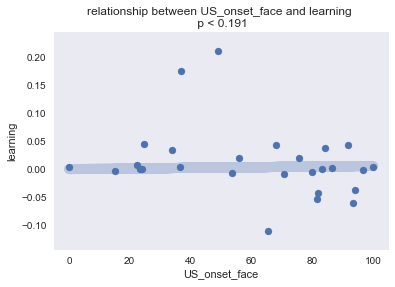

In [100]:
show_relationship(behave, 'US_onset_face', 'learning')

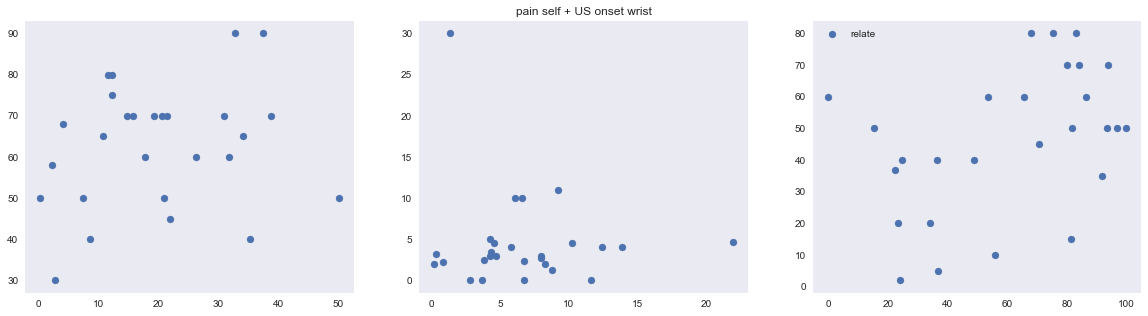

In [156]:

figure(figsize=[20,5])

subplot(1,3,1)
#scatter(behave['CS_offset_face'], behave['empathic_concern'], label = 'empathic_concern')
scatter(behave['CS_stim'], behave['pain_other'], label='pain_other')
#legend()
subplot(1,3,2)
scatter(behave['CS_wrist'], behave['voltage']) 
#scatter(behave['relate'], behave['US_onset_wrist']) 
title('pain self + US onset wrist')
subplot(1,3,3)
scatter(behave['US_onset_face'], behave['relate'])
legend()




	pain_other ~ CS_offset_wrist 

                   df       sum_sq     mean_sq         F    PR(>F)
CS_offset_wrist   1.0   228.508965  228.508965  1.033871  0.318991
Residual         25.0  5525.565109  221.022604       NaN       NaN 




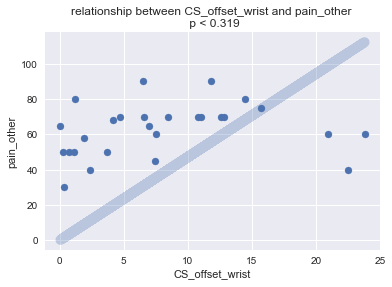

In [251]:
show_relationship(behave, 'CS_offset_wrist', 'pain_other') 


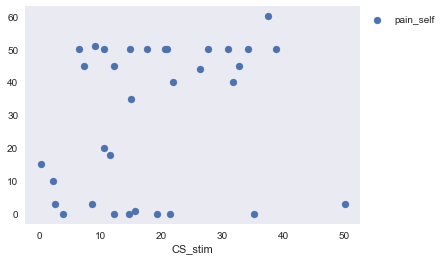

In [499]:

scatter(behave['CS_stim'], behave['pain_self'], label='pain_self')
legend(bbox_to_anchor=(1.25, 1))
xlabel('CS_stim')

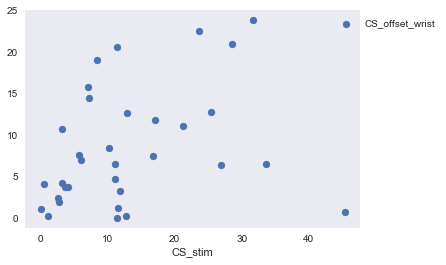

In [500]:

scatter(behave['CS_offset_stim'], behave['CS_offset_wrist'])
legend(bbox_to_anchor=(1.25, 1))
xlabel('CS_stim')

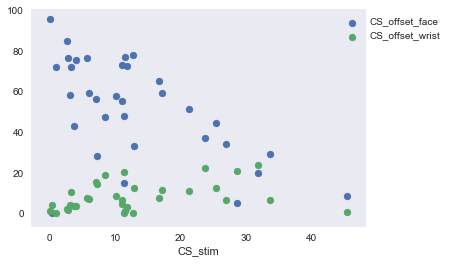

In [501]:

scatter(behave['CS_offset_stim'], behave['CS_offset_face'])
scatter(behave['CS_offset_stim'], behave['CS_offset_wrist'])

legend(bbox_to_anchor=(1.25, 1))
xlabel('CS_stim')

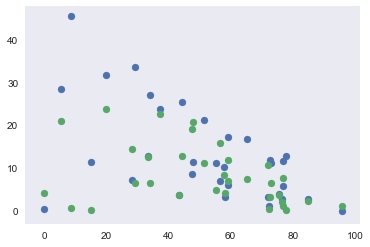

In [502]:
scatter(behave['CS_offset_face'], behave['CS_offset_stim'])
scatter(behave['CS_offset_face'], behave['CS_offset_wrist'])


In [523]:

X = behave['CS_offset_wrist']
y = behave['CS_offset_stim']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
wrist_stim_predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         CS_offset_stim   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     35.06
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           1.36e-06
Time:                        02:17:17   Log-Likelihood:                -128.02
No. Observations:                  33   AIC:                             258.0
Df Residuals:                      32   BIC:                             259.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
CS_offset_wrist     1.1241      0.190      5.921      0.000         0.737     1.511
==============================================================================
Omnibus:                       20.539   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.774
Skew:                           1.544   Prob(JB):                     1.26e-07
Kurtosis:                       6.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

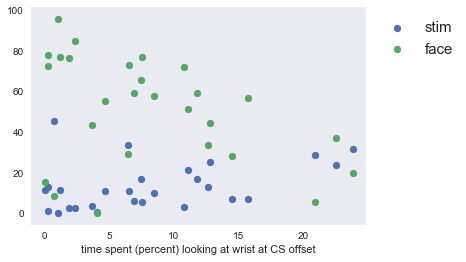

In [113]:
scatter(behave['CS_offset_wrist'], behave['CS_offset_stim'],label='stim')
scatter(behave['CS_offset_wrist'], behave['CS_offset_face'],label='face')
xlabel('time spent (percent) looking at wrist at CS offset')
legend(bbox_to_anchor=(1.3, 1), fontsize=15)
xlim(-1, behave['CS_offset_wrist'].max()+1); 

In [103]:
#behave['US_onset_face'], behave['relate']

x, y  = behave['US_onset_face'], behave['relate']

# Note the difference in argument order
model = sm.OLS(y, x).fit()
face_relate_predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 relate   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     99.41
Date:                Wed, 17 Jan 2018   Prob (F-statistic):           2.25e-10
Time:                        19:44:48   Log-Likelihood:                -123.45
No. Observations:                  27   AIC:                             248.9
Df Residuals:                      26   BIC:                             250.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
US_onset_face     0.6846      0.069      9.971      0.000         0.543     0.826
==============================================================================
Omnibus:                        0.142   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.199
Skew:                           0.146   Prob(JB):                        0.905
Kurtosis:                       2.696   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

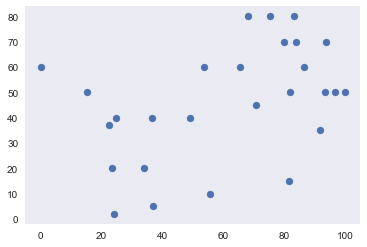

In [114]:
x, y  = behave['US_onset_face'], behave['relate']
#plot(x,face_relate_predictions, linewidth=5,alpha=.1)
scatter(x,y)

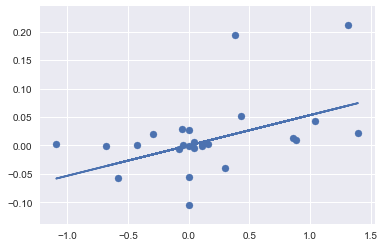

In [538]:
x,y = SCR['renewal'], SCR['learning']

# Note the difference in argument order
model = sm.OLS(y, x).fit()
renewal_learning_p = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

scatter(x,y)
plot(x,renewal_learning_p)


In [4]:
from pandas import read_csv

In [67]:

subject_day = 1
path2data = '/Users/biota/Desktop/sSL/experiment_2/collection/complete_scr_data'

count = 0
raw_data = {}
subjectNames = []
data_path = path2data
files = os.listdir(data_path)
unique_ids = np.unique([files[ii][1:3] for ii in range(len(files))]);

for _id_ in unique_ids:

    # find indices of each unique number--e.g. subject
    subject_inds = np.nonzero([str.find(files[ii], _id_) == 1 for ii in range(len(files))])[0]
    # only include those subjects who have two days of data

    if len(subject_inds) == 2 and _id_ != '47': 

        _raw_data_ = []

        for day in subject_inds:
            if 'd%s'%subject_day in files[day]:
                _day_ = read_csv('%s/%s'%(data_path,files[day]), sep=',',header=None)
                subjectNames.append(files[day][1:3])
                _raw_data_ = _day_.values
                _raw_data_ = _raw_data_[_raw_data_[:,4] == 0]
                raw_data[count] = _raw_data_
                count = count + 1

nSubjects = len(subjectNames)
subjectNames = subjectNames
rawData = raw_data


In [68]:
len(rawData)

48

In [71]:
# plot(rawData[0])
# title(subjectNames[0])

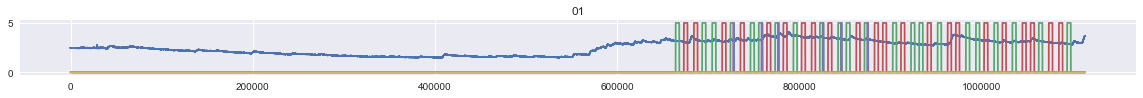

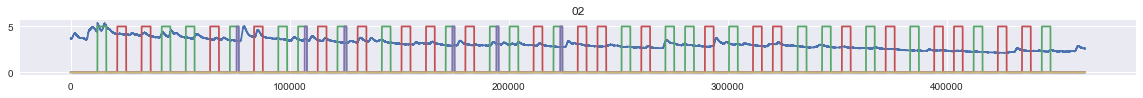

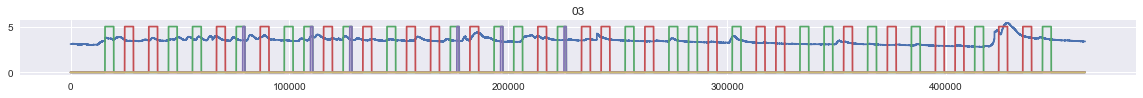

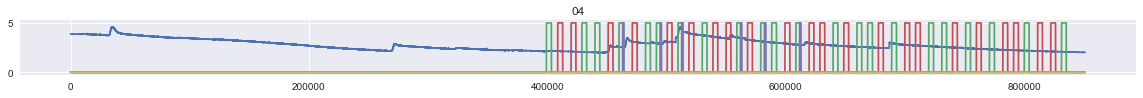

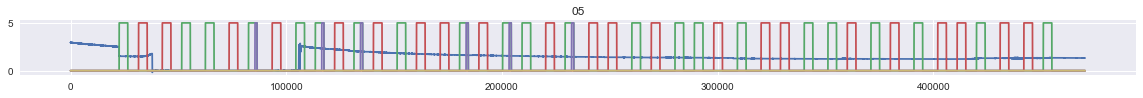

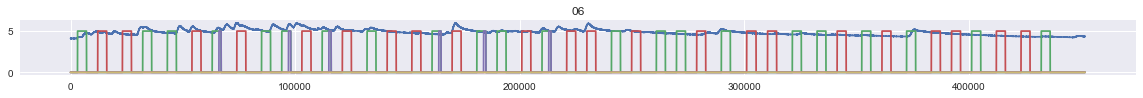

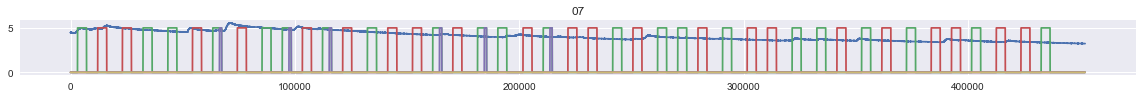

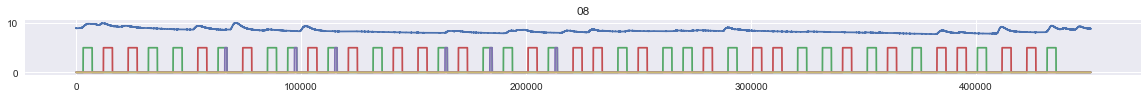

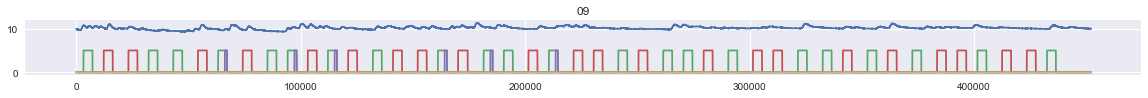

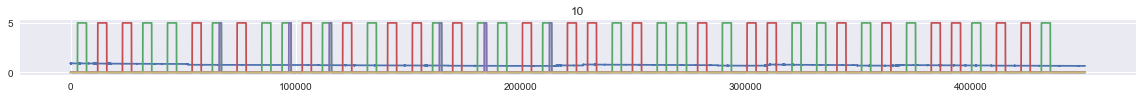

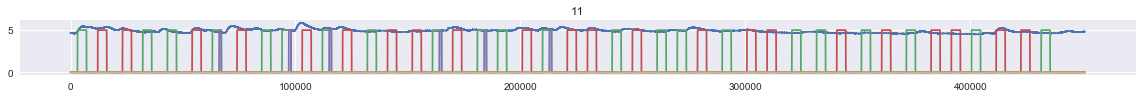

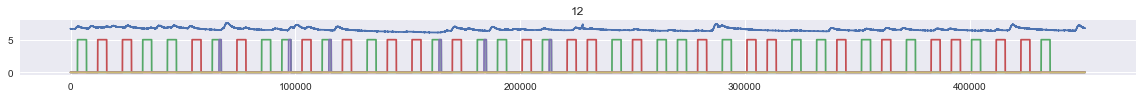

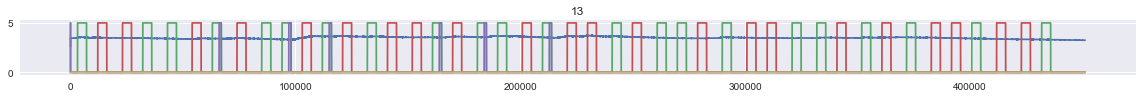

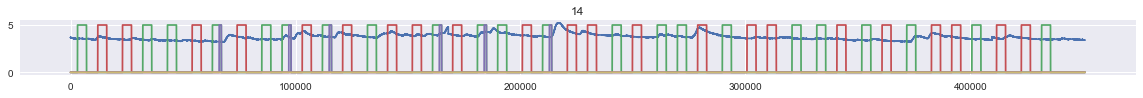

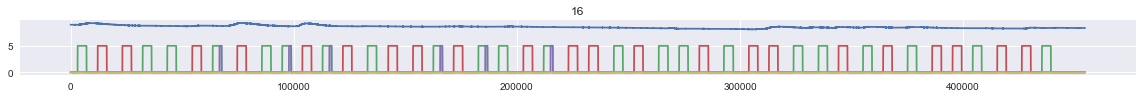

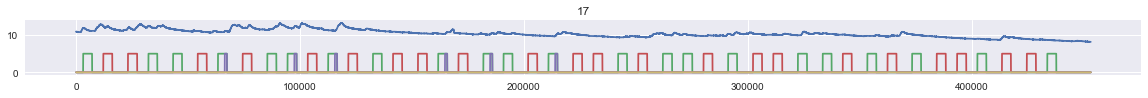

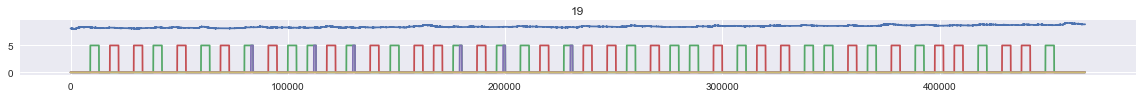

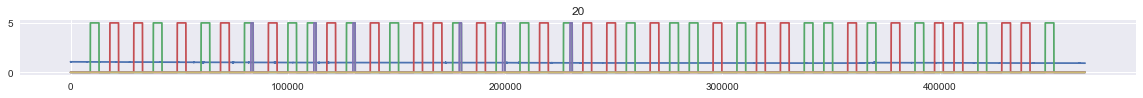

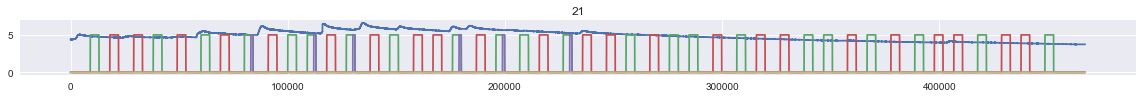

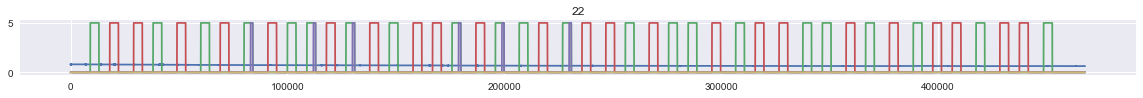

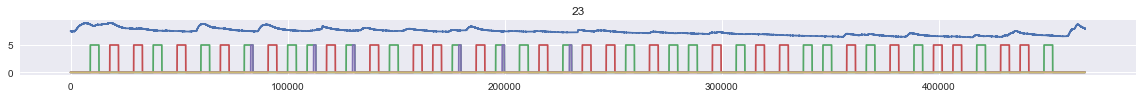

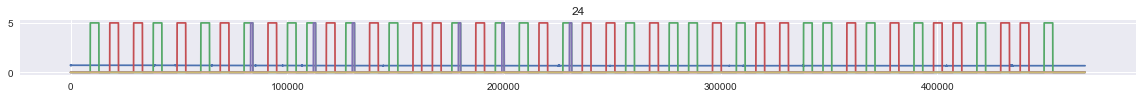

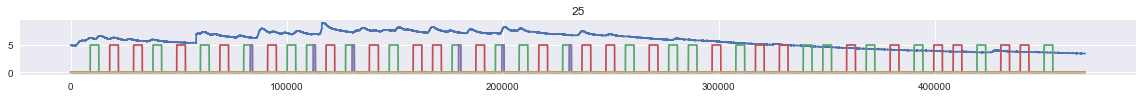

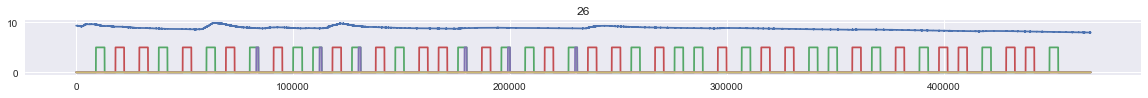

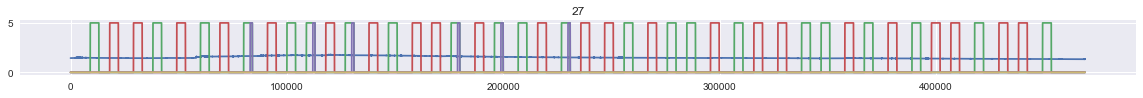

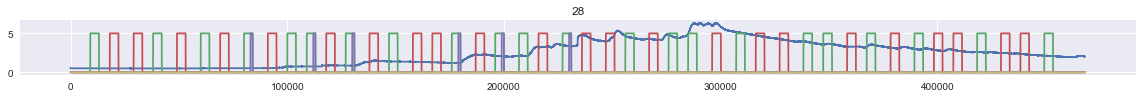

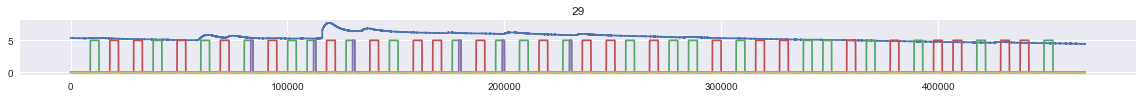

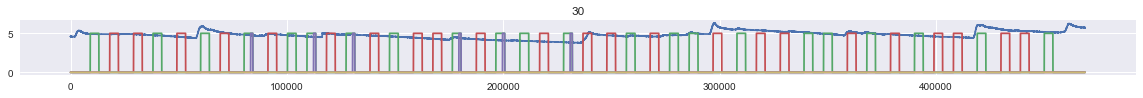

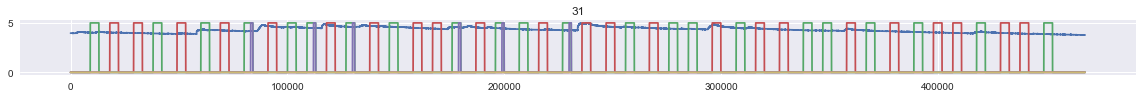

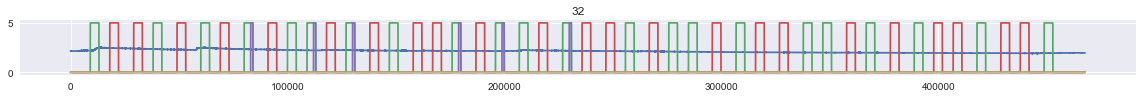

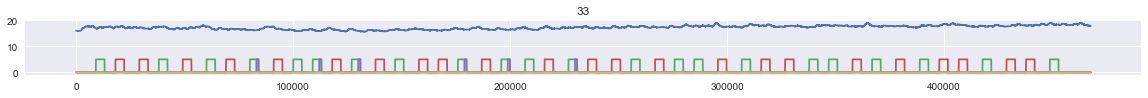

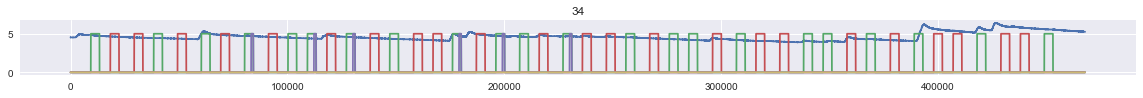

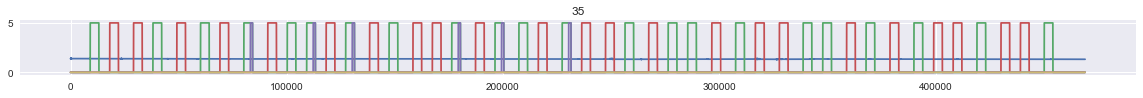

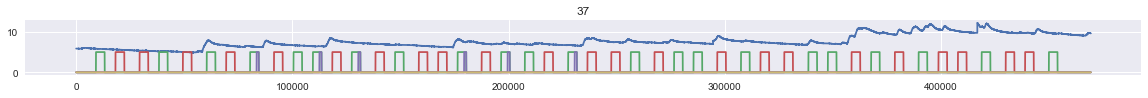

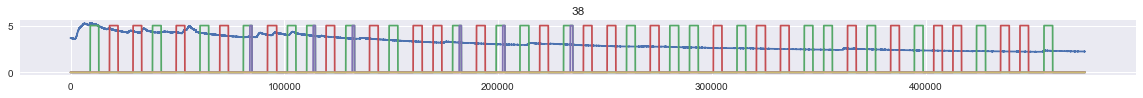

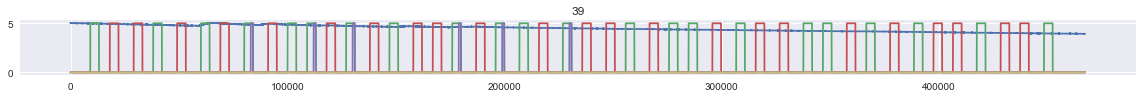

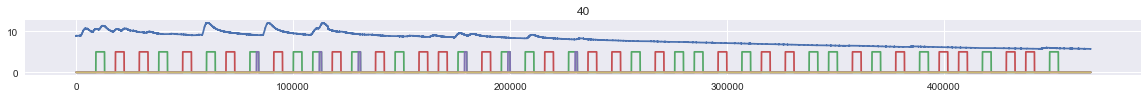

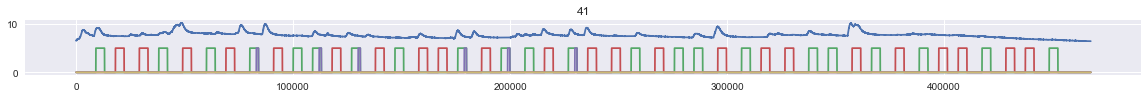

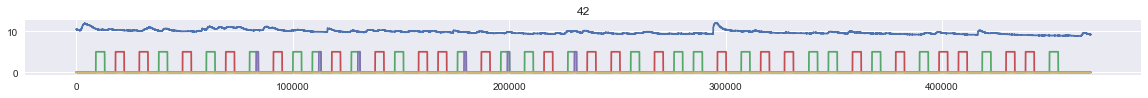

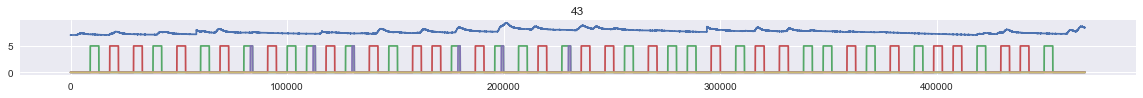

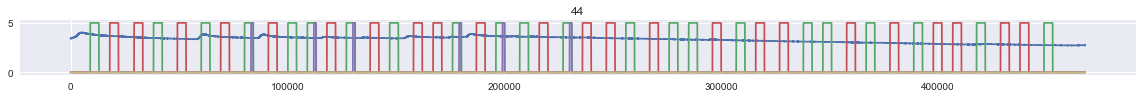

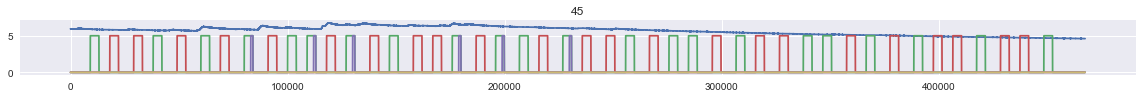

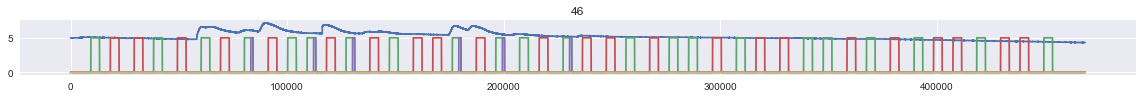

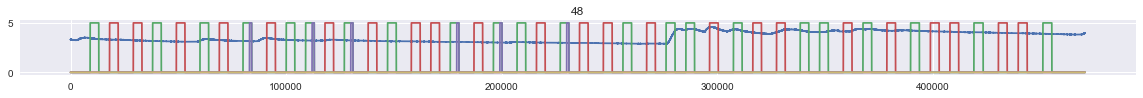

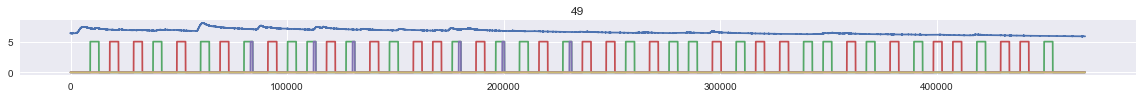

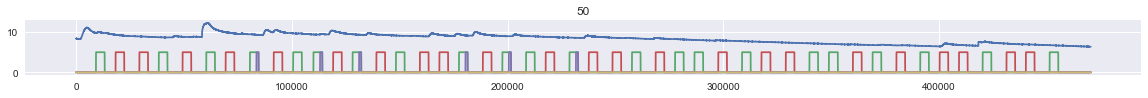

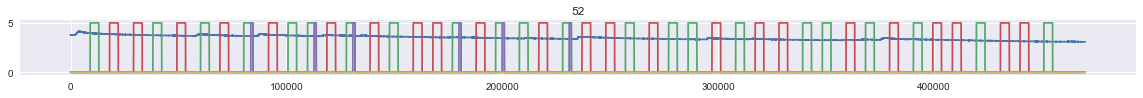

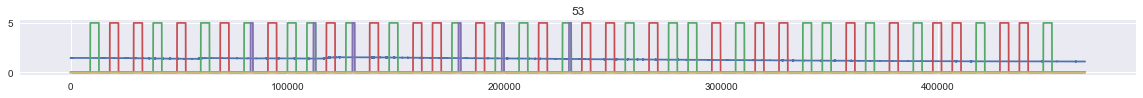

In [70]:
# # first just check that we've got the right counterbalanced assignments. 
# # this is tricky because i fucked up the channels i'm using when signaling the biopac somehow
# # the problem is probably in experiment_2/collection/design_parameters.py
# # in every case, we know that the second CS channel is the CS+ (empirically )

def show_raw_data(rawData, i_subject): 
    figure(figsize=[20,1])
    plot(rawData[i_subject]) #, label='scr')
    title(subjectNames[i_subject])
    legend(fontsize=10);     

for i_subject in range(len(rawData)): 
    show_raw_data(rawData, i_subject) 
